# Sep ??th, 2021

**Motivation**: Using N = 404 ROIs. Different group aggregation <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Mice

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(128))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [3]:
mice = Mice(Config(344), load_df=True)

[PROGRESS] 'bold.df' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-344

Warning! NaN detected:  sub, ses, run = 8, 1, 1

Warning! NaN detected:  sub, ses, run = 10, 2, 1

[PROGRESS] 'bold.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-344

In [5]:
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [6]:
list(mice.bold_combined)

[
    'sub-SLC01_ses-1_run-1',
    'sub-SLC01_ses-1_run-3',
    'sub-SLC01_ses-1_run-5',
    'sub-SLC01_ses-1_run-7',
    'sub-SLC01_ses-2_run-1',
    'sub-SLC01_ses-2_run-3',
    'sub-SLC01_ses-2_run-5',
    'sub-SLC01_ses-2_run-7',
    'sub-SLC01_ses-3_run-1',
    'sub-SLC01_ses-3_run-3',
    'sub-SLC01_ses-3_run-5',
    'sub-SLC01_ses-3_run-7',
    'sub-SLC02_ses-1_run-1',
    'sub-SLC02_ses-1_run-3',
    'sub-SLC02_ses-1_run-5',
    'sub-SLC02_ses-1_run-7',
    'sub-SLC02_ses-2_run-1',
    'sub-SLC02_ses-2_run-3',
    'sub-SLC02_ses-2_run-5',
    'sub-SLC02_ses-3_run-1',
    'sub-SLC02_ses-3_run-3',
    'sub-SLC02_ses-3_run-5',
    'sub-SLC02_ses-3_run-7',
    'sub-SLC03_ses-1_run-2',
    'sub-SLC03_ses-1_run-4',
    'sub-SLC03_ses-1_run-6',
    'sub-SLC03_ses-2_run-1',
    'sub-SLC03_ses-2_run-3',
    'sub-SLC03_ses-2_run-5',
    'sub-SLC03_ses-2_run-7',
    'sub-SLC03_ses-3_run-1',
    'sub-SLC03_ses-3_run-3',
    'sub-SLC03_ses-3_run-5',
    'sub-SLC03_ses-3_run-7',
    'sub-SLC04_ses-1_run-1',
    'sub-SLC04_ses-1_run-3',
    'sub-SLC04_ses-1_run-5',
    'sub-SLC04_ses-1_run-7',
    'sub-SLC04_ses-2_run-1',
    'sub-SLC04_ses-2_run-3',
    'sub-SLC04_ses-2_run-5',
    'sub-SLC04_ses-2_run-7',
    'sub-SLC04_ses-3_run-1',
    'sub-SLC04_ses-3_run-3',
    'sub-SLC04_ses-3_run-5',
    'sub-SLC04_ses-3_run-7',
    'sub-SLC05_ses-1_run-1',
    'sub-SLC05_ses-1_run-3',
    'sub-SLC05_ses-1_run-7',
    'sub-SLC05_ses-2_run-1',
    'sub-SLC05_ses-2_run-3',
    'sub-SLC05_ses-2_run-5',
    'sub-SLC05_ses-2_run-7',
    'sub-SLC05_ses-3_run-1',
    'sub-SLC05_ses-3_run-3',
    'sub-SLC05_ses-3_run-5',
    'sub-SLC05_ses-3_run-7',
    'sub-SLC06_ses-1_run-1',
    'sub-SLC06_ses-1_run-3',
    'sub-SLC06_ses-1_run-5',
    'sub-SLC06_ses-1_run-7',
    'sub-SLC06_ses-2_run-1',
    'sub-SLC06_ses-2_run-3',
    'sub-SLC06_ses-2_run-5',
    'sub-SLC06_ses-2_run-7',
    'sub-SLC06_ses-3_run-1',
    'sub-SLC06_ses-3_run-3',
    'sub-SLC06_ses-3_run-5',
    'sub-SLC06_ses-3_run-7',
    'sub-SLC07_ses-1_run-1',
    'sub-SLC07_ses-1_run-3',
    'sub-SLC07_ses-1_run-5',
    'sub-SLC07_ses-1_run-7',
    'sub-SLC07_ses-2_run-1',
    'sub-SLC07_ses-2_run-3',
    'sub-SLC07_ses-2_run-5',
    'sub-SLC07_ses-2_run-7',
    'sub-SLC07_ses-3_run-1',
    'sub-SLC07_ses-3_run-3',
    'sub-SLC07_ses-3_run-5',
    'sub-SLC07_ses-3_run-7',
    'sub-SLC08_ses-1_run-3',
    'sub-SLC08_ses-1_run-5',
    'sub-SLC08_ses-2_run-1',
    'sub-SLC08_ses-2_run-3',
    'sub-SLC08_ses-2_run-5',
    'sub-SLC08_ses-2_run-7',
    'sub-SLC08_ses-3_run-1',
    'sub-SLC08_ses-3_run-3',
    'sub-SLC08_ses-3_run-5',
    'sub-SLC08_ses-3_run-7',
    'sub-SLC09_ses-1_run-1',
    'sub-SLC09_ses-1_run-3',
    'sub-SLC09_ses-1_run-5',
    'sub-SLC09_ses-1_run-7',
    'sub-SLC09_ses-2_run-1',
    'sub-SLC09_ses-2_run-3',
    'sub-SLC09_ses-2_run-5',
    'sub-SLC09_ses-2_run-7',
    'sub-SLC09_ses-3_run-1',
    'sub-SLC09_ses-3_run-3',
    'sub-SLC09_ses-3_run-5',
    'sub-SLC09_ses-3_run-7',
    'sub-SLC10_ses-1_run-1',
    'sub-SLC10_ses-1_run-3',
    'sub-SLC10_ses-1_run-5',
    'sub-SLC10_ses-1_run-7',
    'sub-SLC10_ses-2_run-3',
    'sub-SLC10_ses-2_run-5',
    'sub-SLC10_ses-2_run-7',
    'sub-SLC10_ses-3_run-1',
    'sub-SLC10_ses-3_run-3',
    'sub-SLC10_ses-3_run-5',
    'sub-SLC10_ses-3_run-7',
    'sub-SLC01_ses-1',
    'sub-SLC01_ses-2',
    'sub-SLC01_ses-3',
    'sub-SLC02_ses-1',
    'sub-SLC02_ses-2',
    'sub-SLC02_ses-3',
    'sub-SLC03_ses-1',
    'sub-SLC03_ses-2',
    'sub-SLC03_ses-3',
    'sub-SLC04_ses-1',
    'sub-SLC04_ses-2',
    'sub-SLC04_ses-3',
    'sub-SLC05_ses-1',
    'sub-SLC05_ses-2',
    'sub-SLC05_ses-3',
    'sub-SLC06_ses-1',
    'sub-SLC06_ses-2',
    'sub-SLC06_ses-3',
    'sub-SLC07_ses-1',
    'sub-SLC07_ses-2',
    'sub-SLC07_ses-3',
    'sub-SLC08_ses-1',
    'sub-SLC08_ses-2',
    'sub-SLC08_ses-3',
    'sub-SLC09_ses-1',
    'sub-SLC09_ses-2',
    'sub-SLC09_ses-3',
    'sub-SLC10_ses-1',
    'sub-SLC10_ses-2',
    'sub-SLC10_ses-3',
  

In [35]:
num_null = mice.bold_combined['sub-SLC'].isnull().values.sum(0)
bad_rois = np.where(num_null)[0]
bad_rois = dict(zip(
    list(mice.bold_combined['sub-SLC'].columns[bad_rois]),
    num_null[bad_rois]
))
bad_rois = dict(sorted(bad_rois.items(), key=lambda x: x[1]))

In [36]:
bad_rois

{
    '1-379': 1100,
    '0-1044': 1650,
    '0-59': 2200,
    '0-169': 2200,
    '0-564': 2200,
    '0-706': 2200,
    '0-1039': 2200,
    '1-149': 2200,
    '1-706': 2200,
    '1-1044': 2200,
    '0-149': 3850,
    '0-189': 4400,
    '0-609': 4400,
    '1-1139': 4400,
    '1-982': 6600,
    '0-333': 8800,
    '0-1120': 10450,
    '1-333': 11000,
    '0-1139': 12650,
    '1-1120': 14300,
    '1-531': 17050,
    '1-912': 18700,
    '0-912': 25300,
    '1-207': 26400,
    '0-939': 37400,
    '0-177': 51700,
    '1-177': 51700,
    '1-939': 53350,
    '0-207': 60500,
    '1-143': 60500,
    '0-143': 61050,
    '0-379': 62700
}

In [19]:
counts = dict(collections.Counter(num_null))
counts = dict(sorted(counts.items()))
counts

{
    0: 656,
    1100: 1,
    1650: 1,
    2200: 8,
    3850: 1,
    4400: 3,
    6600: 1,
    8800: 1,
    10450: 1,
    11000: 1,
    12650: 1,
    14300: 1,
    17050: 1,
    18700: 1,
    25300: 1,
    26400: 1,
    37400: 1,
    51700: 2,
    53350: 1,
    60500: 2,
    61050: 1,
    62700: 1
}

In [3]:
os.listdir(mice.cfg.masks_dir)

[
    'sub-SLC09_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC06_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC08_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC06_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC04_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC08_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC07_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC05_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC02_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC01_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC10_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC02_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC01_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC04_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC07_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC05_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC01_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC05_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC06_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC03_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC03_ses-1_space-CCF_atlas3d-inv.npy',
    'sub-SLC03_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC10_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC10_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC09_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC07_ses-2_space-CCF_atlas3d-inv.npy',
    'sub-SLC08_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC09_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC04_ses-3_space-CCF_atlas3d-inv.npy',
    'sub-SLC02_ses-2_space-CCF_atlas3d-inv.npy'
]

In [11]:
key = 'sub-SLC04_ses-2'
file = pjoin(mice.cfg.masks_dir, f'{key}_space-CCF_atlas3d-inv.npy')
masks = np.load(file, allow_pickle=True).item()

In [12]:
list(masks)

['roi', 'major', 'other']

In [13]:
list(masks['other'])

['root', 'CH', 'Isocortex', 'Isocortex_l', 'Isocortex_r']

In [29]:
m = reset_ants_img(masks['other']['Isocortex'], spacing=0.1)
m

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
mice = Mice(Config(128), load_preproc=True)

In [28]:
from register.register import *

x = mice.T1w[key].get_data()
x = reorient_arr(x)
x = reset_ants_img(x, spacing=0.1)
x

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

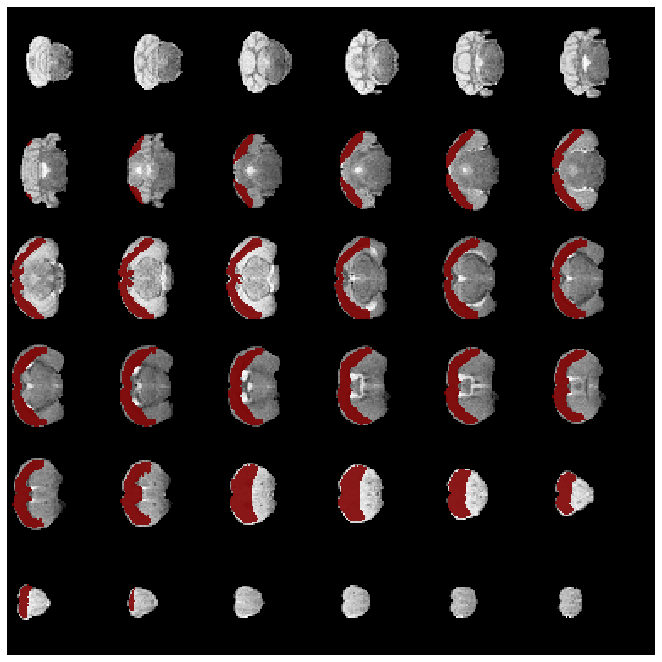

In [33]:
x.plot(
    overlay=m,
    axis=0,
    nslices=36,
)

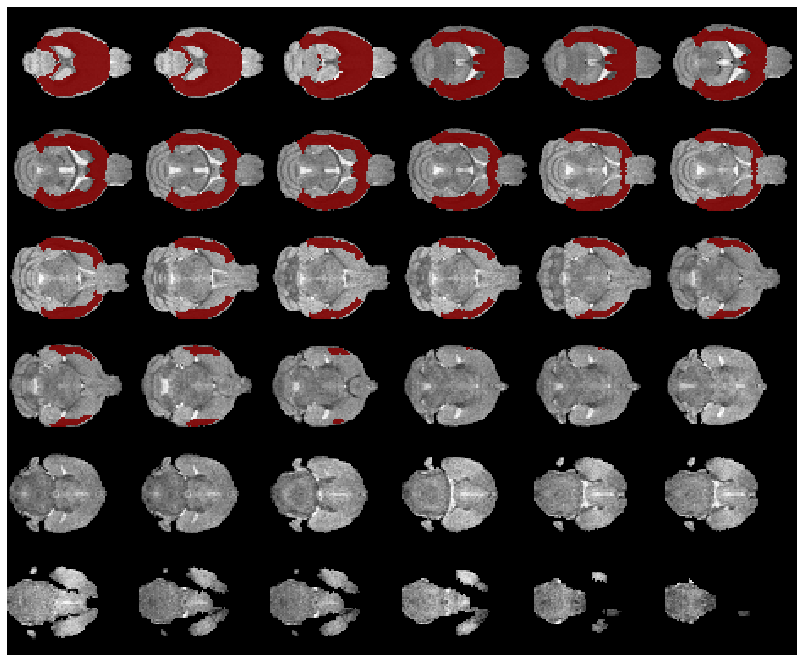

In [34]:
x.plot(
    overlay=m,
    axis=1,
    nslices=36,
)

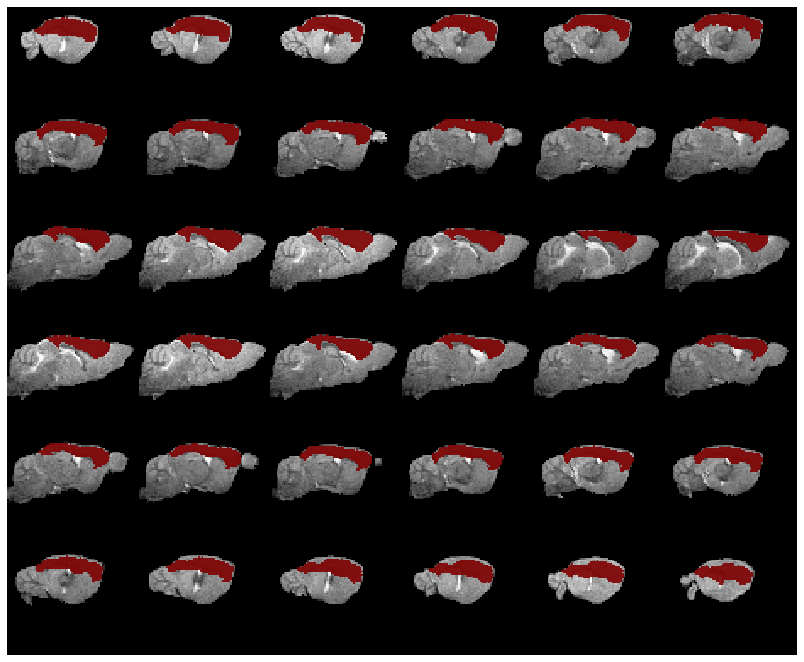

In [35]:
x.plot(
    overlay=m,
    axis=2,
    nslices=36,
)

In [39]:
key = 'sub-SLC09_ses-1'
file = pjoin(mice.cfg.masks_dir, f'{key}_space-CCF_atlas3d-inv.npy')
masks = np.load(file, allow_pickle=True).item()
m = reset_ants_img(masks['other']['Isocortex'], spacing=0.1)
m

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [40]:
x = mice.T1w[key].get_data()
x = reorient_arr(x)
x = reset_ants_img(x, spacing=0.1)
x

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

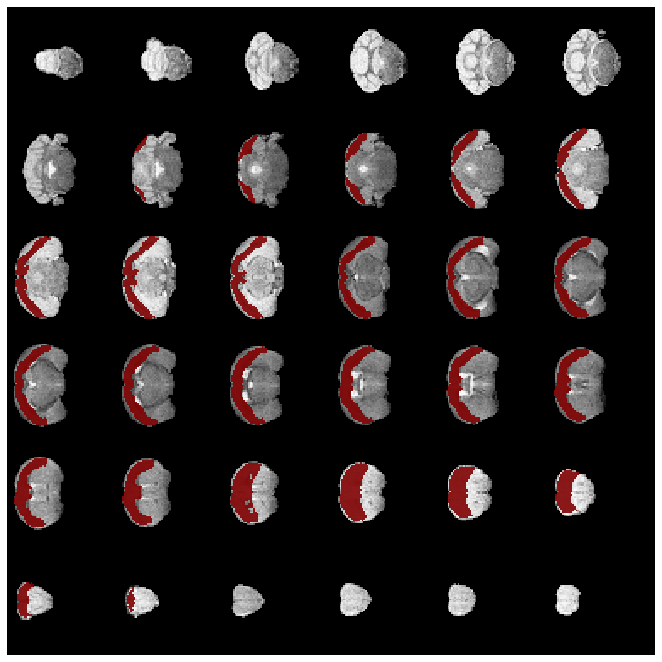

In [41]:
x.plot(
    overlay=m,
    axis=0,
    nslices=36,
)

In [59]:
net = Network(mice, 'sub-SLC', percentiles=np.linspace(30, 5, 26), **svinet_props).load_network()

In [60]:
net.adj.shape

(688, 688)

<matplotlib.image.AxesImage object at 0x7f7a6126aca0>

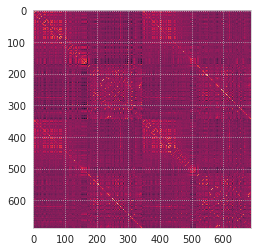

In [61]:
plt.imshow(net.adj)

<AxesSubplot:ylabel='Count'>

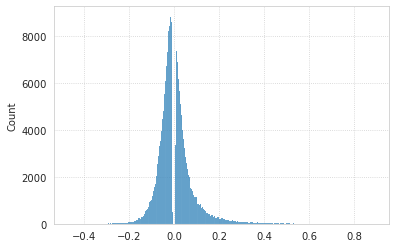

In [57]:
x = net.adj.copy()
sns.histplot(x[x != 0])

In [62]:
net.thresholds

{
    45: 0.0,
    30: 0.020239752374551497,
    29: 0.02186116124784204,
    28: 0.02358690512302717,
    27: 0.025332495224698437,
    26: 0.027130244505014174,
    25: 0.029038761027193334,
    24: 0.03115292882264882,
    23: 0.03325763823287097,
    22: 0.035536986635664604,
    21: 0.03795660861659154,
    20: 0.04043661461314795,
    19: 0.043089087988840716,
    18: 0.045909553019853715,
    17: 0.04889903271301585,
    16: 0.05223722631322099,
    15: 0.055863444238301155,
    14: 0.059935523435427525,
    13: 0.06446505420437706,
    12: 0.06942853386216903,
    11: 0.07508998576333849,
    10: 0.0815726488182793,
    9: 0.08877781533008708,
    8: 0.09738483024644354,
    7: 0.10754011254789178,
    6: 0.11884588751557924,
    5: 0.1336030993634973
}

In [45]:
{k: nx.density(g) for k, g in net.graphs.items()}

{
    45: 0.3890398090789073,
    39: 0.3890398090789073,
    38: 0.38110592058494974,
    37: 0.3710774855285874,
    36: 0.361049050472225,
    35: 0.3510206154158627,
    34: 0.34099218035950035,
    33: 0.33095951389594125,
    32: 0.3209310788395789,
    31: 0.3109026437832165,
    30: 0.3008742087268542,
    29: 0.29084577367049186,
    28: 0.2808173386141295,
    27: 0.2707889035577672,
    26: 0.26075623709420803,
    25: 0.2507278020378457,
    24: 0.24069936698148336,
    23: 0.23067093192512103,
    22: 0.22064249686875867,
    21: 0.21061406181239634,
    20: 0.2005813953488372,
    19: 0.19055296029247487,
    18: 0.1805245252361125,
    17: 0.17049609017975018,
    16: 0.16046765512338784,
    15: 0.15043922006702548,
    14: 0.14041078501066315,
    13: 0.13037811854710402,
    12: 0.12034968349074168,
    11: 0.11032124843437933,
    10: 0.10029281337801699
}

In [42]:
net.thresholds

{
    45: 0.0,
    29: 0.02186116124784204,
    28: 0.02358690512302717,
    27: 0.025332495224698437,
    26: 0.027130244505014174,
    25: 0.029038761027193334,
    24: 0.03115292882264882,
    23: 0.03325763823287097,
    22: 0.035536986635664604,
    21: 0.03795660861659154,
    20: 0.04043661461314795
}

In [34]:
np.where(~np.eye(a.shape[0],dtype=bool), net.adj, np.nan)

array([[        nan,  0.23835392,  0.12616804, ..., -0.11965764,
        -0.00909865, -0.10134143],
       [ 0.23835392,         nan,  0.3892485 , ..., -0.04535648,
        -0.11986433, -0.05061084],
       [ 0.12616804,  0.3892485 ,         nan, ...,  0.        ,
        -0.10726255, -0.0169772 ],
       ...,
       [-0.11965764, -0.04535648,  0.        , ...,         nan,
         0.13252097,  0.1983194 ],
       [-0.00909865, -0.11986433, -0.10726255, ...,  0.13252097,
                nan, -0.03031506],
       [-0.10134143, -0.05061084, -0.0169772 , ...,  0.1983194 ,
        -0.03031506,         nan]])

In [36]:
np.nanpercentile(np.where(~np.eye(a.shape[0],dtype=bool), net.adj, np.nan), 20)

-0.03277837829793304

In [3]:
k = 5
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
num_nodes = len(svinet.adj)

group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-404/results/SVINET/gr
oup_results/real-p20-k5

## Load group results

In [5]:
mice.looper

{
    'sub-SLC01_ses-1_run-1': (1, 1, 1),
    'sub-SLC01_ses-1_run-2': (1, 1, 2),
    'sub-SLC01_ses-1_run-3': (1, 1, 3),
    'sub-SLC01_ses-1_run-4': (1, 1, 4),
    'sub-SLC01_ses-1_run-5': (1, 1, 5),
    'sub-SLC01_ses-1_run-6': (1, 1, 6),
    'sub-SLC01_ses-1_run-7': (1, 1, 7),
    'sub-SLC01_ses-2_run-1': (1, 2, 1),
    'sub-SLC01_ses-2_run-2': (1, 2, 2),
    'sub-SLC01_ses-2_run-3': (1, 2, 3),
    'sub-SLC01_ses-2_run-4': (1, 2, 4),
    'sub-SLC01_ses-2_run-5': (1, 2, 5),
    'sub-SLC01_ses-2_run-6': (1, 2, 6),
    'sub-SLC01_ses-2_run-7': (1, 2, 7),
    'sub-SLC01_ses-3_run-1': (1, 3, 1),
    'sub-SLC01_ses-3_run-2': (1, 3, 2),
    'sub-SLC01_ses-3_run-3': (1, 3, 3),
    'sub-SLC01_ses-3_run-4': (1, 3, 4),
    'sub-SLC01_ses-3_run-5': (1, 3, 5),
    'sub-SLC01_ses-3_run-6': (1, 3, 6),
    'sub-SLC01_ses-3_run-7': (1, 3, 7),
    'sub-SLC02_ses-1_run-1': (2, 1, 1),
    'sub-SLC02_ses-1_run-2': (2, 1, 2),
    'sub-SLC02_ses-1_run-3': (2, 1, 3),
    'sub-SLC02_ses-1_run-4': (2, 1, 4),
    'sub-SLC02_ses-1_run-5': (2, 1, 5),
    'sub-SLC02_ses-1_run-6': (2, 1, 6),
    'sub-SLC02_ses-1_run-7': (2, 1, 7),
    'sub-SLC02_ses-2_run-1': (2, 2, 1),
    'sub-SLC02_ses-2_run-2': (2, 2, 2),
    'sub-SLC02_ses-2_run-3': (2, 2, 3),
    'sub-SLC02_ses-2_run-4': (2, 2, 4),
    'sub-SLC02_ses-2_run-5': (2, 2, 5),
    'sub-SLC02_ses-2_run-6': (2, 2, 6),
    'sub-SLC02_ses-2_run-7': (2, 2, 7),
    'sub-SLC02_ses-3_run-1': (2, 3, 1),
    'sub-SLC02_ses-3_run-2': (2, 3, 2),
    'sub-SLC02_ses-3_run-3': (2, 3, 3),
    'sub-SLC02_ses-3_run-4': (2, 3, 4),
    'sub-SLC02_ses-3_run-5': (2, 3, 5),
    'sub-SLC02_ses-3_run-6': (2, 3, 6),
    'sub-SLC02_ses-3_run-7': (2, 3, 7),
    'sub-SLC03_ses-1_run-1': (3, 1, 1),
    'sub-SLC03_ses-1_run-2': (3, 1, 2),
    'sub-SLC03_ses-1_run-3': (3, 1, 3),
    'sub-SLC03_ses-1_run-4': (3, 1, 4),
    'sub-SLC03_ses-1_run-5': (3, 1, 5),
    'sub-SLC03_ses-1_run-6': (3, 1, 6),
    'sub-SLC03_ses-1_run-7': (3, 1, 7),
    'sub-SLC03_ses-2_run-1': (3, 2, 1),
    'sub-SLC03_ses-2_run-2': (3, 2, 2),
    'sub-SLC03_ses-2_run-3': (3, 2, 3),
    'sub-SLC03_ses-2_run-4': (3, 2, 4),
    'sub-SLC03_ses-2_run-5': (3, 2, 5),
    'sub-SLC03_ses-2_run-6': (3, 2, 6),
    'sub-SLC03_ses-2_run-7': (3, 2, 7),
    'sub-SLC03_ses-3_run-1': (3, 3, 1),
    'sub-SLC03_ses-3_run-2': (3, 3, 2),
    'sub-SLC03_ses-3_run-3': (3, 3, 3),
    'sub-SLC03_ses-3_run-4': (3, 3, 4),
    'sub-SLC03_ses-3_run-5': (3, 3, 5),
    'sub-SLC03_ses-3_run-6': (3, 3, 6),
    'sub-SLC03_ses-3_run-7': (3, 3, 7),
    'sub-SLC04_ses-1_run-1': (4, 1, 1),
    'sub-SLC04_ses-1_run-2': (4, 1, 2),
    'sub-SLC04_ses-1_run-3': (4, 1, 3),
    'sub-SLC04_ses-1_run-4': (4, 1, 4),
    'sub-SLC04_ses-1_run-5': (4, 1, 5),
    'sub-SLC04_ses-1_run-6': (4, 1, 6),
    'sub-SLC04_ses-1_run-7': (4, 1, 7),
    'sub-SLC04_ses-2_run-1': (4, 2, 1),
    'sub-SLC04_ses-2_run-2': (4, 2, 2),
    'sub-SLC04_ses-2_run-3': (4, 2, 3),
    'sub-SLC04_ses-2_run-4': (4, 2, 4),
    'sub-SLC04_ses-2_run-5': (4, 2, 5),
    'sub-SLC04_ses-2_run-6': (4, 2, 6),
    'sub-SLC04_ses-2_run-7': (4, 2, 7),
    'sub-SLC04_ses-3_run-1': (4, 3, 1),
    'sub-SLC04_ses-3_run-2': (4, 3, 2),
    'sub-SLC04_ses-3_run-3': (4, 3, 3),
    'sub-SLC04_ses-3_run-4': (4, 3, 4),
    'sub-SLC04_ses-3_run-5': (4, 3, 5),
    'sub-SLC04_ses-3_run-6': (4, 3, 6),
    'sub-SLC04_ses-3_run-7': (4, 3, 7),
    'sub-SLC05_ses-1_run-1': (5, 1, 1),
    'sub-SLC05_ses-1_run-2': (5, 1, 2),
    'sub-SLC05_ses-1_run-3': (5, 1, 3),
    'sub-SLC05_ses-1_run-4': (5, 1, 4),
    'sub-SLC05_ses-1_run-5': (5, 1, 5),
    'sub-SLC05_ses-1_run-6': (5, 1, 6),
    'sub-SLC05_ses-1_run-7': (5, 1, 7),
    'sub-SLC05_ses-2_run-1': (5, 2, 1),
    'sub-SLC05_ses-2_run-2': (5, 2, 2),
    'sub-SLC05_ses-2_run-3': (5, 2, 3),
    'sub-SLC05_ses-2_run-4': (5, 2, 4),
    'sub-SLC05_ses-2_run-5': (5, 2, 5),
    'sub-SLC05_ses-2_run-6': (5, 2, 6),
    'sub-SLC05_ses-2_run-7': (5, 2, 7),
    'sub-SLC05_ses-3_run-1': (5, 3, 1),
    'sub-SLC05_ses-3_run-2': (5, 3, 2)

In [4]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

IndexError: list index out of range

In [ ]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(11, 3.5))

In [6]:
svinets = load_svinet_all(mice, k, p, **svinet_props)

  0%|          | 0/158 [00:00<?, ?it/s]

In [7]:
gam_aggr = collections.defaultdict(list)

for key, sv in svinets.items():
    try:
        sub, ses, run = mice.looper[key]
    except KeyError:
        sub, run = -1, -1
        ses = int(key.split('-')[1])
    if run == -1:
        continue
    gam_aggr[mice.get_key(sub, ses)].append(np.expand_dims(sv.gam, 0))
gam_aggr = {key: np.concatenate(x) for key, x in gam_aggr.items()}

In [8]:
gam = np.empty((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    k, num_nodes,
))
for key, x in gam_aggr.items():
    sub, ses, _ = mice.looper[key]
    gam[sub - 1, ses - 1] = np.nanmean(x, 0)

gam_avg = np.nanmean(np.nanmean(gam, 1), 0)
pi_avg = gam_avg / np.nansum(gam_avg, 0, keepdims=True)

pi_avg.shape, gam_avg.shape, gam.shape

((6, 300), (6, 300), (10, 3, 6, 300))

In [9]:
group['gam'] = gam
group['gam_avg'] = gam_avg
group['pi_avg'] = pi_avg

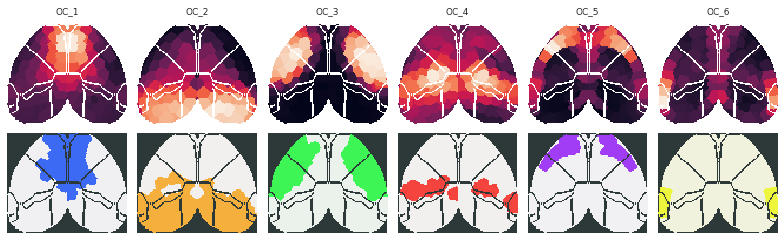

In [10]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(11, 3.5))

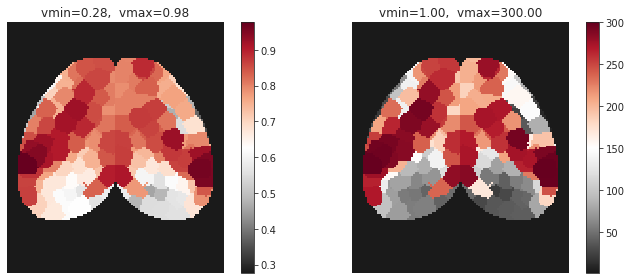

In [11]:
eh = entropy_expect_beta(gam_avg)
ehr = sp_stats.rankdata(eh)

fig, axes = create_figure(1, 2, (10, 4))

for i, ax in enumerate(axes.ravel()):
    data2plt = eh if i == 0 else ehr
    mask = svinet.pi2arr(data2plt.reshape(1, -1), cortex_only=True)[1]
    im = ax.imshow(mask, vmin=min(data2plt), vmax=max(data2plt), cmap='RdGy_r')
    plt.colorbar(im, ax=ax)
    ax.set_title(f"vmin={min(data2plt):0.2f},  vmax={max(data2plt):0.2f}")
remove_ticks(axes)

In [12]:
eh.shape

(300,)

In [13]:
l2h_sorted = dict(sorted(zip(svinet.l2n, eh), key=lambda x: x[1]))

In [14]:
l2h_sorted

{
    '1-315-140': 0.277242643966673,
    '0-315-30': 0.2823068519584285,
    '1-315-142': 0.28348203788320964,
    '1-315-131': 0.2856388503505062,
    '1-315-155': 0.3182938177532818,
    '1-315-145': 0.3196719609573622,
    '1-315-154': 0.3458980857028409,
    '1-315-138': 0.3641964885966505,
    '0-315-44': 0.36966992916117863,
    '1-315-143': 0.3764146359121578,
    '1-315-152': 0.3809799064797011,
    '1-315-127': 0.38354322284515757,
    '0-315-39': 0.3860779584464634,
    '1-315-161': 0.4046862952539494,
    '0-315-18': 0.40691374401163555,
    '0-315-26': 0.4138380606805033,
    '0-315-54': 0.42245671977155014,
    '0-315-42': 0.43882110278863096,
    '1-315-116': 0.449943108930148,
    '0-315-41': 0.4585602889064119,
    '1-315-193': 0.4593243582227767,
    '0-315-27': 0.46437248964135347,
    '0-315-28': 0.4682710262750817,
    '1-315-133': 0.4728663714255749,
    '1-315-130': 0.47553083252032735,
    '1-315-129': 0.4761388340412558,
    '1-315-162': 0.4787909957260843,
    '1-315-194': 0.48254990760643096,
    '1-315-196': 0.48427173116270295,
    '0-315-29': 0.5017712271472802,
    '1-315-126': 0.5068148433740749,
    '1-315-119': 0.5136621010019994,
    '0-315-53': 0.5150936627671935,
    '1-315-141': 0.5177548368105556,
    '1-315-128': 0.522265225996198,
    '0-315-40': 0.5361437320895457,
    '1-315-200': 0.5506577806738969,
    '1-315-150': 0.5526929768795729,
    '1-315-201': 0.5556660871286647,
    '1-315-202': 0.5590997969608639,
    '1-315-186': 0.561260799911147,
    '0-315-95': 0.5665604997448768,
    '1-315-197': 0.5670094136327724,
    '0-315-92': 0.5694268559839214,
    '1-315-198': 0.5733848489903582,
    '1-315-191': 0.5845357726316767,
    '1-339': 0.5846822563280252,
    '0-315-90': 0.5869230436153614,
    '0-315-15': 0.5992758134423689,
    '0-315-37': 0.6027265090402611,
    '0-315-20': 0.6057773124409205,
    '0-339': 0.6065845083243683,
    '0-315-93': 0.6066974159090144,
    '1-315-184': 0.6069330476709748,
    '0-315-96': 0.6192923393025966,
    '0-315-100': 0.6197128191344335,
    '1-315-187': 0.6197162050222708,
    '0-315-99': 0.6268718115017814,
    '1-315-112': 0.6306217817602909,
    '1-315-110': 0.630969286372487,
    '0-315-85': 0.6342758302814129,
    '1-315-153': 0.6354092667303851,
    '0-826': 0.6455001443411911,
    '1-315-189': 0.6465270418843106,
    '0-315-10': 0.6478014637661081,
    '1-315-120': 0.6483675743089666,
    '0-315-19': 0.6608897714188806,
    '1-987': 0.6630347643203885,
    '0-315-83': 0.6636603311098388,
    '1-826': 0.6639562164237922,
    '0-315-60': 0.6649598883544379,
    '0-315-88': 0.668051820242892,
    '0-315-61': 0.6696020206835922,
    '0-315-101': 0.670401970199315,
    '0-315-97': 0.6711957879517714,
    '1-315-177': 0.6727380026061058,
    '0-315-86': 0.672849275524895,
    '1-566': 0.6732343207309965,
    '0-315-11': 0.6763685265762582,
    '1-315-199': 0.6771460737135111,
    '0-589508447': 0.6773520711540361,
    '1-1117': 0.6801136642056086,
    '1-315-121': 0.6830963889095886,
    '1-315-149': 0.6834165595051539,
    '0-315-76': 0.6848012442807105,
    '1-315-178': 0.6886992900681697,
    '1-275': 0.6891227526711206,
    '1-348': 0.6903767894771149,
    '1-315-168': 0.6971455890819974,
    '0-348': 0.7005634553334258,
    '0-918': 0.7006133253892036,
    '0-315-77': 0.7011293436776866,
    '0-835': 0.7014974472564497,
    '1-1097': 0.7056720064947001,
    '0-1097': 0.7065647813052073,
    '0-619': 0.7073798570735909,
    '0-315-98': 0.7077146602826537,
    '0-484682508': 0.7077830446108344,
    '0-315-23': 0.7080710318340862,
    '1-315-111': 0.7086941668265057,
    '0-703': 0.7095141634864642,
    '0-315-51': 0.7111837046605035,
    '0-1132': 0.7116418149765574,
    '0-323': 0.7136410119399664,
    '0-987': 0.715801493922865,
    '0-315-64': 0.7159547230812883,
    '1-1132': 0.7185565857092526,
    '1-315-179': 0.7201757393112962,
    '0-631': 0.721922047881822,
    '0-278': 0.7248892309074351,
    '0-386': 0.7254319760323479,
    '0-375':

In [15]:
cortical_region_overlaps = mice.parcel.get_region_overlap()

  0%|          | 0/202 [00:00<?, ?it/s]

In [16]:
for region, val in l2h_sorted.items():
    if str(315) not in region:
        continue
    region_i = int(region.split('-')[-1])
    print(region, np.round(val, 3), cortical_region_overlaps[region_i])

1-315-140 0.277
{'SS': 100.0, 'SSp': 80.0, 'SSp-m': 80.0, 'SSs': 20.0}

0-315-30 0.282
{'SS': 58.0, 'SSp': 58.0, 'SSp-m': 58.0, 'MO': 42.0, 'MOp': 42.0}

1-315-142 0.283
{'SS': 100.0, 'SSs': 87.0}

1-315-131 0.286
{'MO': 52.0, 'MOp': 52.0, 'SS': 48.0, 'SSp': 48.0, 'SSp-m': 48.0}

1-315-155 0.318
{'SS': 100.0, 'SSs': 89.0}

1-315-145 0.32
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 58.0, 'SSp-n': 42.0}

1-315-154 0.346
{'SS': 64.0, 'SSs': 64.0, 'VISC': 36.0}

1-315-138 0.364
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-44 0.37
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 55.0, 'SSp-n': 45.0}

1-315-143 0.376
{'SS': 60.0, 'SSs': 60.0, 'GU': 29.0}

1-315-152 0.381
{'SS': 100.0, 'SSp': 78.0, 'SSp-n': 78.0, 'SSs': 22.0}

1-315-127 0.384
{'SS': 90.0, 'SSp': 90.0, 'SSp-m': 90.0}

0-315-39 0.386
{'SS': 100.0, 'SSp': 74.0, 'SSp-m': 74.0, 'SSs': 26.0}

1-315-161 0.405
{'SS': 100.0, 'SSs': 100.0}

0-315-18 0.407
{'MO': 98.0, 'MOs': 63.0, 'MOp': 35.0}

0-315-26 0.414
{'SS': 95.0, 'SSp': 95.0, 'SSp-m': 95.0}

0-315-54 0.422
{'SS': 100.0, 'SSs': 94.0}

0-315-42 0.439
{'SS': 61.0, 'SSs': 61.0, 'GU': 26.0}

1-315-116 0.45
{'MO': 100.0, 'MOp': 100.0}

0-315-41 0.459
{'SS': 100.0, 'SSs': 91.0}

1-315-193 0.459
{'VIS': 100.0}

0-315-27 0.464
{'MO': 86.0, 'MOp': 86.0}

0-315-28 0.468
{'MO': 100.0, 'MOp': 94.0}

1-315-133 0.473
{'SS': 99.0, 'SSp': 99.0, 'SSp-m': 72.0, 'SSp-ul': 26.0}

1-315-130 0.476
{'GU': 51.0, 'SS': 48.0, 'SSp': 37.0, 'SSp-m': 37.0}

1-315-129 0.476
{'MO': 100.0, 'MOp': 87.0}

1-315-162 0.479
{'SS': 100.0, 'SSp': 91.0, 'SSp-bfd': 46.0, 'SSp-n': 45.0}

1-315-194 0.483
{'VIS': 100.0}

1-315-196 0.484
{'RSP': 88.0}

0-315-29 0.502
{'SS': 52.0, 'GU': 48.0, 'SSp': 36.0, 'SSp-m': 36.0}

1-315-126 0.507
{'MO': 100.0, 'MOp': 100.0}

1-315-119 0.514
{'MO': 96.0, 'MOs': 72.0, 'MOp': 24.0}

0-315-53 0.515
{'SS': 63.0, 'SSs': 63.0, 'VISC': 37.0}

1-315-141 0.518
{'SS': 67.0, 'SSp': 67.0, 'SSp-ul': 66.0, 'MO': 33.0, 'MOp': 33.0}

1-315-128 0.522
{'MO': 88.0, 'MOp': 88.0}

0-315-40 0.536
{'SS': 74.0, 'SSp': 74.0, 'SSp-ul': 67.0, 'MO': 26.0, 'MOp': 26.0}

1-315-200 0.551
{'VIS': 55.0, 'RSP': 45.0}

1-315-150 0.553
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 90.0}

1-315-201 0.556
{'VIS': 76.0, 'RSP': 24.0}

1-315-202 0.559
{'VIS': 100.0}

1-315-186 0.561
{'VIS': 100.0}

0-315-95 0.567
{'RSP': 77.0, 'VIS': 23.0}

1-315-197 0.567
{'VIS': 100.0}

0-315-92 0.569
{'VIS': 100.0}

1-315-198 0.573
{'VIS': 98.0}

1-315-191 0.585
{'RSP': 100.0}

0-315-90 0.587
{'RSP': 100.0}

0-315-15 0.599
{'MO': 100.0, 'MOp': 100.0}

0-315-37 0.603
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-20 0.606
{'MO': 70.0, 'MOp': 70.0}

0-315-93 0.607
{'VIS': 100.0}

1-315-184 0.607
{'VIS': 53.0, 'RSP': 47.0}

0-315-96 0.619
{'VIS': 100.0}

0-315-100 0.62
{'VIS': 86.0}

1-315-187 0.62
{'VIS': 67.0, 'PTLp': 33.0}

0-315-99 0.627
{'VIS': 64.0, 'RSP': 36.0}

1-315-112 0.631
{'PL': 77.0, 'ACA': 23.0}

1-315-110 0.631
{'MO': 100.0, 'MOs': 99.0}

0-315-85 0.634
{'VIS': 100.0}

1-315-153 0.635
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 45.0, 'SSp-ul': 29.0}

1-315-189 0.647
{'VIS': 94.0}

0-315-10 0.648
{'MO': 79.0, 'MOp': 57.0, 'MOs': 22.0, 'AI': 21.0}

1-315-120 0.648
{'ACA': 75.0, 'MO': 25.0, 'MOs': 25.0}

0-315-19 0.661
{'ACA': 65.0, 'MO': 35.0, 'MOs': 35.0}

0-315-83 0.664
{'VIS': 67.0, 'RSP': 33.0}

0-315-60 0.665
{'SS': 100.0, 'SSs': 100.0}

0-315-88 0.668
{'VIS': 88.0}

0-315-61 0.67
{'SS': 100.0, 'SSp': 84.0, 'SSp-bfd': 43.0, 'SSp-n': 41.0}

0-315-101 0.67
{'VIS': 100.0}

0-315-97 0.671
{'VIS': 94.0}

1-315-177 0.673
{'PTLp': 65.0, 'VIS': 35.0}

0-315-86 0.673
{'VIS': 65.0, 'PTLp': 35.0}

0-315-11 0.676
{'PL': 73.0, 'ACA': 25.0}

1-315-199 0.677
{'VIS': 95.0}

1-315-121 0.683
{'MO': 75.0, 'MOp': 75.0}

1-315-149 0.683
{'AI': 70.0, 'GU': 30.0}

0-315-76 0.685
{'PTLp': 72.0, 'VIS': 28.0}

1-315-178 0.689
{'PTLp': 73.0}

1-315-168 0.697
{'SS': 97.0, 'SSs': 97.0}

0-315-77 0.701
{'PTLp': 72.0}

0-315-98 0.708
{'VIS': 91.0}

0-315-23 0.708
{'AI': 100.0}

1-315-111 0.709
{'MO': 73.0, 'MOp': 46.0, 'AI': 27.0, 'MOs': 27.0}

0-315-51 0.711
{'SS': 100.0, 'SSp': 71.0, 'SSp-n': 71.0, 'SSs': 29.0}

0-315-64 0.716
{'SS': 95.0, 'SSp': 95.0, 'SSp-tr': 70.0, 'SSp-ll': 24.0}

1-315-179 0.72
{'RSP': 100.0}

1-315-190 0.726
{'AUD': 74.0, 'TEa': 26.0}

1-315-174 0.729
{'RSP': 81.0}

0-315-78 0.731
{'RSP': 100.0}

0-315-35 0.737
{'MO': 69.0, 'MOs': 69.0, 'ACA': 31.0}

0-315-87 0.741
{'ECT': 50.0, 'TEa': 36.0}

1-315-165 0.742
{'SS': 93.0, 'SSp': 93.0, 'SSp-tr': 72.0, 'SSp-ll': 21.0}

0-315-52 0.744
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 44.0, 'SSp-n': 21.0}

0-315-9 0.745
{'MO': 100.0, 'MOs': 94.0}

0-315-89 0.745
{'AUD': 78.0, 'TEa': 22.0}

1-315-123 0.747
{'MO': 70.0, 'MOs': 70.0, 'ACA': 28.0}

0-315-32 0.748
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 84.0}

0-315-14 0.748
{'AI': 100.0}

0-315-73 0.749
{'RSP': 66.0, 'PTLp': 21.0}

1-315-169 0.752
{'VISC': 65.0, 'SS': 26.0, 'SSs': 26.0}

0-315-4 0.752
{'MO': 100.0, 'MOs': 100.0}

1-315-115 0.753
{'AI': 99.0}

1-315-135 0.759
{'AI': 88.0}

1-315-136 0.761
{'MO': 60.0, 'MOs': 60.0, 'ACA': 40.0}

0-315-65 0.763
{'SS': 93.0, 'SSp': 93.0, 'SSp-bfd': 46.0, 'SSp-tr': 30.0}

1-315-108 0.763
{'MO': 100.0, 'MOs': 100.0}

1-315-105 0.764
{'MO': 100.0, 'MOs': 100.0}

0-315-81 0.766
{'AUD': 55.0, 'SS': 35.0, 'SSs': 31.0}

1-315-114 0.767
{'ORB': 65.0, 'ILA': 35.0}

1-315-124 0.767
{'AI': 100.0}

1-315-164 0.773
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-158 0.774
{'RSP': 71.0, 'MO': 24.0}

1-315-109 0.778
{'ORB': 100.0}

1-315-192 0.779
{'RSP': 100.0}

0-315-13 0.782
{'ORB': 70.0, 'ILA': 30.0}

0-315-55 0.784
{'MO': 57.0, 'MOp': 53.0, 'SS': 43.0, 'SSp': 43.0, 'SSp-ll': 42.0}

1-315-137 0.784
{'MO': 96.0, 'MOs': 55.0, 'MOp': 41.0}

0-315-33 0.788
{'ACA': 100.0}

1-315-195 0.788
{'TEa': 64.0, 'ECT': 25.0}

1-315-122 0.79
{'PL': 62.0, 'ACA': 24.0}

0-315-57 0.79
{'RSP': 64.0, 'MO': 22.0}

0-315-8 0.791
{'ORB': 100.0}

0-315-5 0.792
{'ORB': 98.0}

1-315-163 0.794
{'AI': 75.0, 'VISC': 25.0}

0-315-25 0.795
{'MO': 100.0, 'MOp': 100.0}

0-315-45 0.796
{'MO': 91.0, 'MOs': 81.0}

1-315-103 0.798
{'PL': 51.0, 'FRP': 34.0}

0-315-80 0.799
{'ECT': 70.0, 'TEa': 22.0}

0-315-74 0.8
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-106 0.801
{'ORB': 97.0}

1-315-125 0.802
{'MO': 100.0, 'MOs': 100.0}

1-315-118 0.802
{'MO': 100.0, 'MOs': 89.0}

0-315-48 0.804
{'AI': 68.0, 'GU': 30.0}

1-315-134 0.804
{'ACA': 100.0}

1-315-166 0.804
{'SS': 90.0, 'SSp': 90.0, 'SSp-tr': 37.0, 'SSp-bfd': 33.0}

0-315-21 0.806
{'PL': 65.0, 'ACA': 20.0}

1-315-113 0.808
{'MO': 40.0, 'MOs': 40.0, 'ORB': 25.0}

1-315-156 0.813
{'MO': 71.0, 'MOp': 59.0, 'SS': 29.0, 'SSp': 29.0, 'SSp-ll': 29.0}

0-315-12 0.814
{'MO': 49.0, 'MOs': 49.0, 'ORB': 23.0}

0-315-6 0.814
{'AI': 70.0, 'ORB': 30.0}

1-315-144 0.814
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

1-315-171 0.814
{'SS': 78.0, 'SSs': 78.0, 'AUD': 22.0}

0-315-50 0.815
{'SS': 99.0, 'SSp': 99.0, 'SSp-ll': 94.0}

0-315-46 0.815
{'ACA': 99.0}

0-315-16 0.822
{'ORB': 86.0}

1-315-182 0.825
{'AUD': 47.0, 'SS': 39.0, 'SSs': 31.0}

1-315-107 0.828
{'AI': 55.0, 'ORB': 45.0}

1-315-146 0.83
{'MO': 85.0, 'MOs': 82.0}

0-315-71 0.833
{'AI': 40.0, 'VISC': 25.0, 'ECT': 23.0}

0-315-34 0.833
{'AI': 85.0}

0-315-91 0.833
{'RSP': 100.0}

0-315-22 0.836
{'MO': 81.0, 'MOs': 81.0}

1-315-117 0.837
{'ORB': 96.0}

0-315-59 0.838
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 58.0, 'SSp-ll': 28.0}

1-315-151 0.84
{'SS': 96.0, 'SSp': 96.0, 'SSp-ll': 95.0}

1-315-147 0.84
{'ACA': 100.0}

0-315-24 0.842
{'MO': 100.0, 'MOs': 100.0}

0-315-69 0.843
{'RSP': 100.0}

1-315-188 0.844
{'ECT': 51.0, 'TEa': 35.0}

0-315-68 0.844
{'VISC': 66.0, 'SS': 23.0, 'SSs': 23.0}

0-315-1 0.847
{'MO': 92.0, 'MOs': 92.0}

0-315-3 0.848
{'ORB': 57.0, 'FRP': 28.0}

0-315-62 0.851
{'AI': 71.0, 'VISC': 29.0}

0-315-38 0.852
{'MO': 100.0, 'MOp': 90.0}

0-315-2 0.852
{'FRP': 41.0, 'PL': 39.0}

1-315-160 0.854
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 53.0, 'SSp-ll': 42.0}

0-315-36 0.855
{'MO': 100.0, 'MOp': 54.0, 'MOs': 45.0}

0-315-58 0.86
{'RSP': 68.0, 'ACA': 28.0}

0-315-7 0.861
{'MO': 100.0, 'MOs': 100.0}

1-315-102 0.861
{'MO': 88.0, 'MOs': 88.0}

0-315-49 0.862
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 97.0}

0-315-84 0.862
{'AUD': 97.0}

1-315-175 0.863
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-148 0.864
{'MO': 53.0, 'MOp': 53.0, 'SS': 47.0, 'SSp': 47.0, 'SSp-ll': 25.0, 'SSp-ul': 21.0}

1-315-159 0.866
{'RSP': 73.0, 'ACA': 26.0}

0-315-94 0.866
{'TEa': 66.0, 'ECT': 25.0}

1-315-132 0.868
{'MO': 99.0, 'MOp': 99.0}

1-315-170 0.868
{'RSP': 100.0}

1-315-173 0.869
{'SS': 99.0, 'SSs': 65.0, 'SSp': 34.0, 'SSp-bfd': 34.0}

1-315-139 0.872
{'MO': 100.0, 'MOp': 77.0, 'MOs': 23.0}

1-315-167 0.873
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-79 0.88
{'AUD': 100.0}

1-315-104 0.888
{'ORB': 68.0, 'FRP': 27.0}

0-315-47 0.891
{'SS': 58.0, 'SSp': 58.0, 'MO': 42.0, 'MOp': 42.0, 'SSp-ul': 34.0, 'SSp-ll': 24.0}

0-315-17 0.892
{'MO': 100.0, 'MOs': 80.0}

0-315-82 0.902
{'RSP': 100.0}

1-315-181 0.903
{'ECT': 73.0, 'TEa': 21.0}

0-315-56 0.904
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 76.0, 'SSp-un': 23.0}

0-315-66 0.905
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-183 0.91
{'RSP': 100.0}

0-315-72 0.914
{'SS': 96.0, 'SSs': 72.0, 'SSp': 25.0, 'SSp-bfd': 25.0}

0-315-43 0.917
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 96.0}

1-315-172 0.922
{'AI': 43.0, 'VISC': 25.0, 'ECT': 21.0}

0-315-63 0.923
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-31 0.923
{'MO': 97.0, 'MOp': 97.0}

1-315-157 0.927
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 65.0, 'SSp-un': 29.0}

0-315-67 0.933
{'SS': 96.0, 'SSs': 96.0}

0-315-70 0.947
{'SS': 74.0, 'SSs': 74.0, 'AUD': 26.0}

1-315-176 0.953
{'AUD': 78.0, 'TEa': 22.0}

1-315-185 0.955
{'AUD': 98.0}

1-315-180 0.961
{'AUD': 100.0}

0-315-75 0.977
{'AUD': 77.0, 'TEa': 23.0}

In [17]:
sub_cortical = []
for lbl in svinet.l2n:
    if str(315) not in lbl and str(0) in lbl:
        sub_cortical.append(int(lbl.split('-')[-1]))
sub_cortical = mice.allen['structure_tree'].get_structures_by_id(sub_cortical)

In [18]:
for region, val in l2h_sorted.items():
    if str(315) in region:
        continue
    region_i = int(region.split('-')[-1])
    struct = next(e for e in sub_cortical if e['id'] == region_i)
    print(region, np.round(val, 3), f"{struct['acronym']} ({struct['name']})")

1-339 0.585 MBsen (Midbrain, sensory related)

0-339 0.607 MBsen (Midbrain, sensory related)

0-826 0.646 PALm (Pallidum, medial region)

1-987 0.663 P-mot (Pons, motor related)

1-826 0.664 PALm (Pallidum, medial region)

1-566 0.673 TR (Postpiriform transition area)

0-589508447 0.677 HATA (Hippocampo-amygdalar transition area)

1-1117 0.68 P-sat (Pons, behavioral state related)

1-275 0.689 LSX (Lateral septal complex)

1-348 0.69 MBsta (Midbrain, behavioral state related)

0-348 0.701 MBsta (Midbrain, behavioral state related)

0-918 0.701 ENTl (Entorhinal area, lateral part)

0-835 0.701 PALv (Pallidum, ventral region)

1-1097 0.706 HY (Hypothalamus)

0-1097 0.707 HY (Hypothalamus)

0-619 0.707 NLOT (Nucleus of the lateral olfactory tract)

0-484682508 0.708 APr (Area prostriata)

0-703 0.71 CTXsp (Cortical subplate)

0-1132 0.712 P-sen (Pons, sensory related)

0-323 0.714 MBmot (Midbrain, motor related)

0-987 0.716 P-mot (Pons, motor related)

1-1132 0.719 P-sen (Pons, sensory related)

0-631 0.722 COA (Cortical amygdalar area)

0-278 0.725 sAMY (Striatum-like amygdalar nuclei)

0-386 0.725 MY-sen (Medulla, sensory related)

0-375 0.726 CA (Ammon's horn)

0-275 0.726 LSX (Lateral septal complex)

0-788 0.727 PAA (Piriform-amygdalar area)

0-1117 0.73 P-sat (Pons, behavioral state related)

0-961 0.732 PIR (Piriform area)

0-726 0.732 DG (Dentate gyrus)

0-493 0.736 STRv (Striatum ventral region)

1-835 0.738 PALv (Pallidum, ventral region)

1-323 0.739 MBmot (Midbrain, motor related)

1-809 0.739 PALc (Pallidum, caudal region)

0-566 0.741 TR (Postpiriform transition area)

1-278 0.743 sAMY (Striatum-like amygdalar nuclei)

0-1084 0.744 PRE (Presubiculum)

0-502 0.747 SUB (Subiculum)

0-370 0.749 MY-mot (Medulla, motor related)

0-484682470 0.752 ProS (Prosubiculum)

0-645 0.753 VERM (Vermal regions)

0-809 0.756 PALc (Pallidum, caudal region)

1-589508447 0.757 HATA (Hippocampo-amygdalar transition area)

1-493 0.758 STRv (Striatum ventral region)

0-1049 0.761 FL (Flocculus)

1-370 0.762 MY-mot (Medulla, motor related)

0-1017 0.769 AN (Ansiform lobule)

1-484682470 0.77 ProS (Prosubiculum)

1-589 0.771 TT (Taenia tecta)

1-484682508 0.772 APr (Area prostriata)

0-589 0.772 TT (Taenia tecta)

1-1084 0.773 PRE (Presubiculum)

0-1041 0.773 PFL (Paraflocculus)

0-814 0.774 DP (Dorsal peduncular area)

0-864 0.777 DORsm (Thalamus, sensory-motor cortex related)

0-926 0.78 ENTm (Entorhinal area, medial part, dorsal zone)

0-843 0.783 PAR (Parasubiculum)

0-856 0.784 DORpm (Thalamus, polymodal association cortex related)

1-645 0.785 VERM (Vermal regions)

0-1007 0.785 SIM (Simple lobule)

0-1025 0.785 PRM (Paramedian lobule)

1-926 0.787 ENTm (Entorhinal area, medial part, dorsal zone)

1-843 0.789 PAR (Parasubiculum)

1-619 0.789 NLOT (Nucleus of the lateral olfactory tract)

0-1037 0.791 POST (Postsubiculum)

1-159 0.791 AON (Anterior olfactory nucleus)

1-1017 0.792 AN (Ansiform lobule)

1-631 0.792 COA (Cortical amygdalar area)

1-1007 0.794 SIM (Simple lobule)

1-502 0.795 SUB (Subiculum)

1-386 0.795 MY-sen (Medulla, sensory related)

1-814 0.798 DP (Dorsal peduncular area)

0-507 0.799 MOB (Main olfactory bulb)

1-788 0.802 PAA (Piriform-amygdalar area)

1-726 0.804 DG (Dentate gyrus)

0-159 0.805 AON (Anterior olfactory nucleus)

0-1033 0.817 COPY (Copula pyramidis)

1-864 0.817 DORsm (Thalamus, sensory-motor cortex related)

1-856 0.818 DORpm (Thalamus, polymodal association cortex related)

1-1033 0.819 COPY (Copula pyramidis)

1-375 0.821 CA (Ammon's horn)

1-1037 0.831 POST (Postsubiculum)

1-703 0.831 CTXsp (Cortical subplate)

1-507 0.833 MOB (Main olfactory bulb)

1-918 0.833 ENTl (Entorhinal area, lateral part)

1-485 0.839 STRd (Striatum dorsal region)

1-1041 0.847 PFL (Paraflocculus)

0-485 0.847 STRd (Striatum dorsal region)

1-151 0.849 AOB (Accessory olfactory bulb)

1-1025 0.85 PRM (Paramedian lobule)

1-961 0.853 PIR (Piriform area)

0-519 0.857 CBN (Cerebellar nuclei)

1-1049 0.864 FL (Flocculus)

1-519 0.874 CBN (Cerebellar nuclei)

0-151 0.887 AOB (Accessory olfactory bulb)

0-818 0.891 PALd (Pallidum, dorsal region)

1-818 0.911 PALd (Pallidum, dorsal region)

## Compute $Y_{ij}$

In [19]:
y, y_avg = node_sim_matrix(group)
y.shape, y_avg.shape

((10, 300, 300), (300, 300))

In [20]:
np.isnan(y).sum(), np.isnan(y_avg).sum()

(0, 0)

### Brief t-SNE before moving on

In [21]:
from sklearn.manifold import TSNE
y_emb = TSNE(
    n_components=2,
    perplexity=30,
    random_state=mice.cfg.random_state,
).fit_transform(y_avg)
y_emb.shape

(300, 2)

In [22]:
hemis = np.array(['R'] * len(svinet.n2l))
hemis[svinet.l_ids] = 'L'

cortex_subcortex = np.array(['Subcortex'] * len(svinet.n2l))
cortex_subcortex[[str(315) in e for e in svinet.l2n]] = 'Cortex'

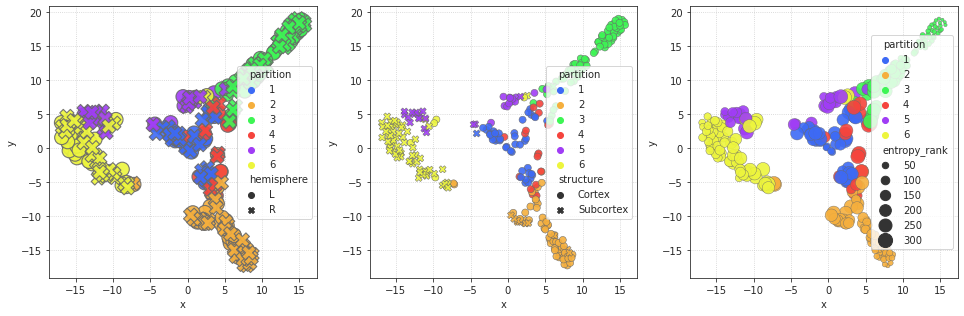

In [23]:
fig, axes = create_figure(1, 3, (13.5, 4.5), 'ticks')

_df = pd.DataFrame({
    'x': y_emb[:, 0],
    'y': y_emb[:, 1],
    'partition': 1 + np.argmax(pi_avg, axis=0),
    'structure': cortex_subcortex,
    'hemisphere': hemis,
    'entropy': eh,
    'entropy_rank': ehr,
})
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='hemisphere',
    markers={'L': 'o', 'R': 'X'},
    palette=svinet.colors,
    s=200,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[0],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='structure',
    markers={'Cortex': 'o', 'Subcortex': 'X'},
    palette=svinet.colors,
    s=50,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[1],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    size='entropy_rank',
    sizes=(10, 200),
    palette=svinet.colors,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[2],
)

for ax in axes.ravel():
    ax.grid()
plt.show()

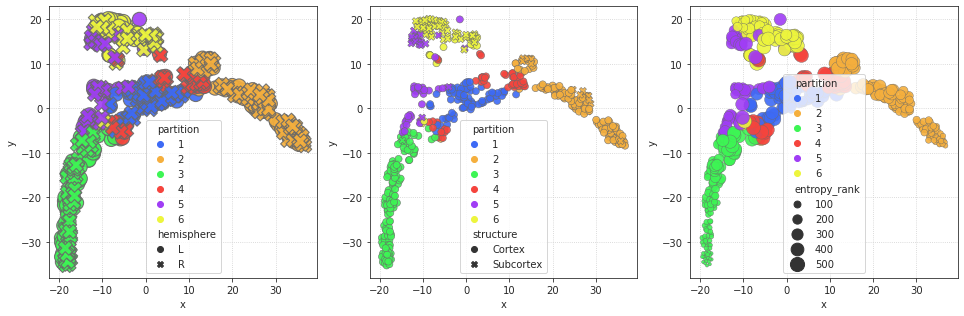

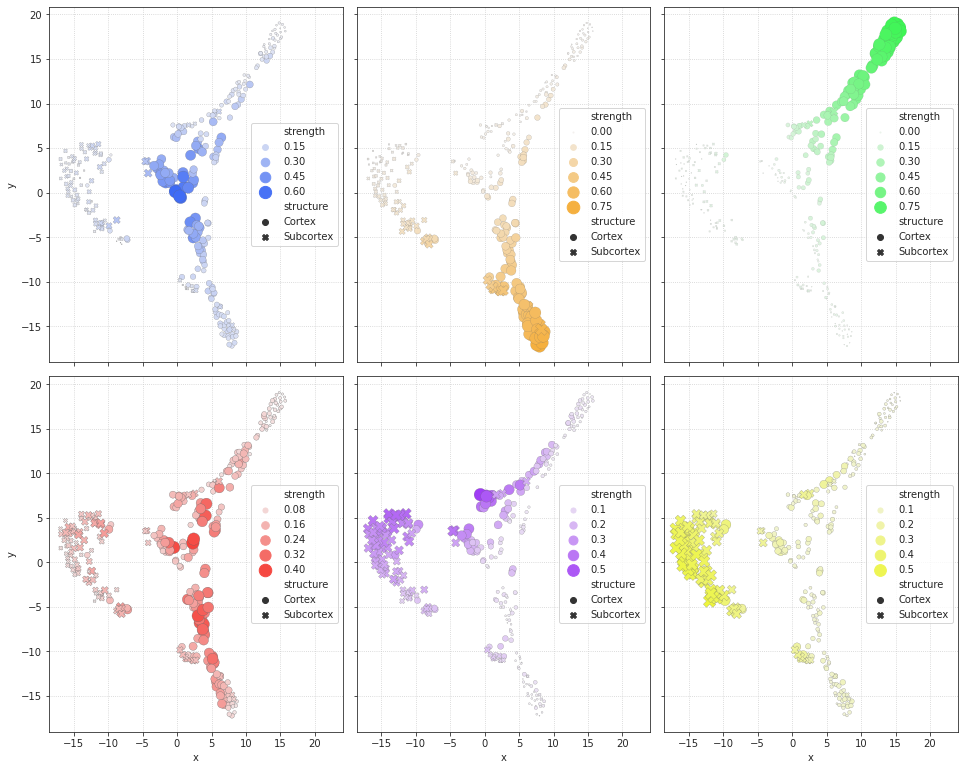

In [28]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 5.4 * nrows), 'ticks', 'all', 'all')

for i, ax in enumerate(axes.ravel()):
    if i == k:
        break

    _df = pd.DataFrame({
        'x': y_emb[:, 0],
        'y': y_emb[:, 1],
        'hemisphere': hemis,
        'structure': cortex_subcortex,
        'strength': np.round(pi_avg[i, :], 2),
    })
    sns.scatterplot(
        data=_df,
        x='x',
        y='y',
        hue='strength',
        size='strength',
        style='structure',
        sizes=(1, 160),
        palette=svinet.cmaps[i+1],
        s=120,
        edgecolor='dimgrey',
        ax=ax,
    )
    ax.set_xlim((ax.get_xlim()[0], 24))
    ax.legend(loc="center right")
    ax.grid()
trim_axs(axes, k)
plt.show()

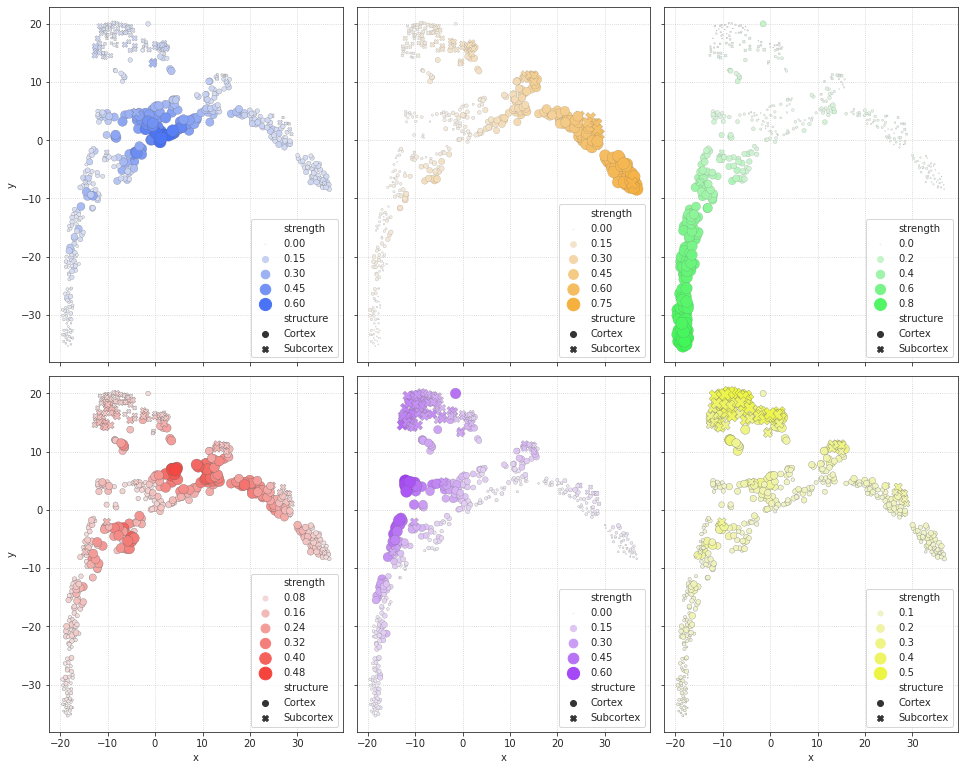

In [60]:
svinet.path = tmp_dir
svinet.best_qs = [0.65]

In [61]:
svinet.render(pi_avg, cortex_only=True)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/overlap_cortex_k6.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/disjoint_cortex_k6.html

In [62]:
svinet.render(pi_avg, cortex_only=False)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/overlap_brain_k6.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/disjoint_brain_k6.html

## k = 8

In [2]:
svinet_props = {
    'task': 'rest',
    'mode': 'bold',
    'metric': 'pearson',
    'match_metric': 'euclidean',
    'graph_type': 'real',
}
mice = Mice(Config(404))
mice.combine_dfs(svinet_props.get('task', 'rest'), full=True)

In [3]:
k = 8
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
num_nodes = len(svinet.adj)

group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-404/results/SVINET/gr
oup_results/real-p20-k8

## Load group results

In [4]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

group_bins(0.2,1.0;4)_(2021_09_19).npy

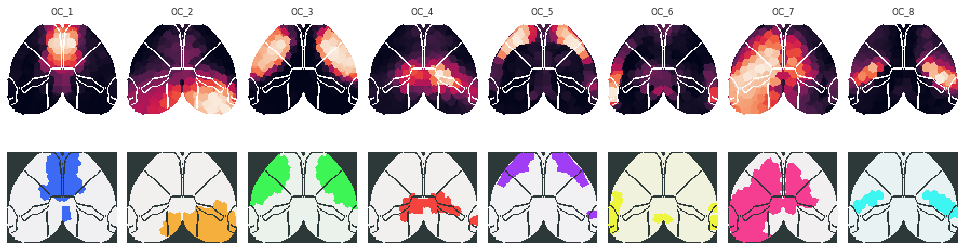

In [5]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(13.5, 4.2))

In [6]:
svinets = load_svinet_all(mice, k, p, **svinet_props)

  0%|          | 0/158 [00:00<?, ?it/s]

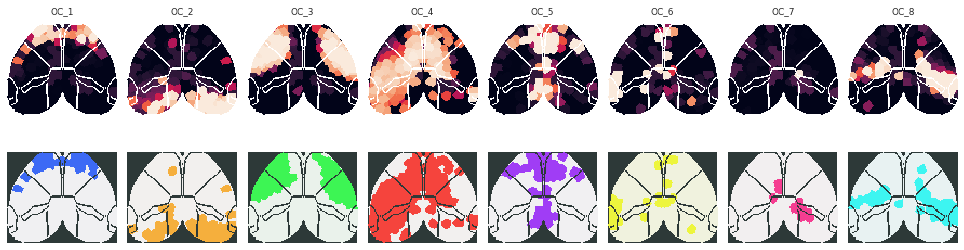

In [7]:
svinets['sub-SLC06_ses-1_run-3'].show(figsize=(13.5, 4.2))

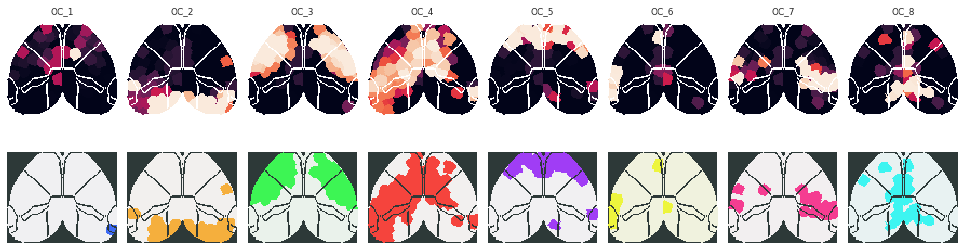

In [8]:
gam_aggr = collections.defaultdict(list)

for key, sv in svinets.items():
    try:
        sub, ses, run = mice.looper[key]
    except KeyError:
        sub, run = -1, -1
        ses = int(key.split('-')[1])
    if run == -1:
        continue

    x = np.nanmedian(sv.gam_all, 0)
    x = np.expand_dims(x, axis=0)
    gam_aggr[mice.get_key(sub, ses)].append(x)

gam_aggr = {key: np.concatenate(x) for key, x in gam_aggr.items()}

In [9]:
gam = np.empty((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    k, num_nodes,
))
for key, x in gam_aggr.items():
    sub, ses, _ = mice.looper[key]
    gam[sub - 1, ses - 1] = np.nanmean(x, 0)

gam_avg = np.nanmean(np.nanmean(gam, 1), 0)
pi_avg = gam_avg / np.nansum(gam_avg, 0, keepdims=True)

pi_avg.shape, gam_avg.shape, gam.shape

((8, 502), (8, 502), (10, 3, 8, 502))

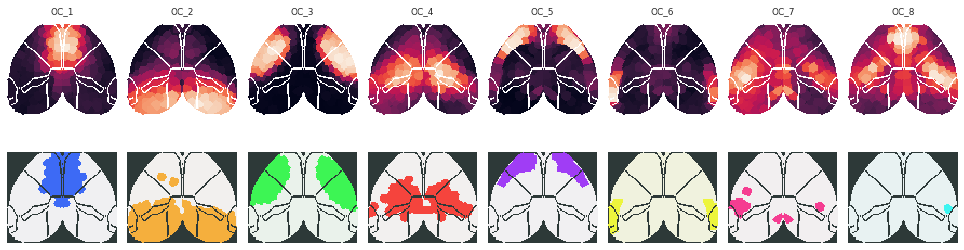

In [10]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(pi_avg, figsize=(13.5, 4.2))

In [11]:
group['gam'] = gam
group['gam_avg'] = gam_avg
group['pi_avg'] = pi_avg

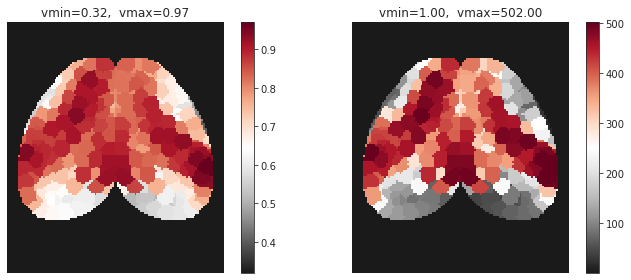

In [12]:
eh = entropy_expect_beta(gam_avg)
ehr = sp_stats.rankdata(eh)

fig, axes = create_figure(1, 2, (10, 4))

for i, ax in enumerate(axes.ravel()):
    data2plt = eh if i == 0 else ehr
    mask = svinet.pi2arr(data2plt.reshape(1, -1), cortex_only=True)[1]
    im = ax.imshow(mask, vmin=min(data2plt), vmax=max(data2plt), cmap='RdGy_r')
    plt.colorbar(im, ax=ax)
    ax.set_title(f"vmin={min(data2plt):0.2f},  vmax={max(data2plt):0.2f}")
remove_ticks(axes)

In [13]:
eh.shape

(502,)

In [14]:
l2h_sorted = dict(sorted(zip(svinet.l2n, eh), key=lambda x: x[1]))

In [15]:
l2h_sorted

{
    '1-315-284': 0.3195745202589277,
    '1-315-294': 0.3318197729257265,
    '1-315-303': 0.341003653257874,
    '0-315-63': 0.34332250868211006,
    '1-315-281': 0.35253344662820163,
    '1-315-265': 0.3588079259521136,
    '1-315-285': 0.36157958594487943,
    '0-315-61': 0.36896363289619516,
    '1-315-282': 0.3741795354512009,
    '1-315-283': 0.3757241637197012,
    '1-315-261': 0.38689537169624755,
    '0-315-45': 0.3877960136726322,
    '1-315-301': 0.39622859396095556,
    '1-315-267': 0.3984208472938742,
    '1-315-302': 0.3990342070920115,
    '0-315-82': 0.40600232146290954,
    '1-315-308': 0.41575592904993836,
    '0-315-80': 0.41601522147237074,
    '1-315-295': 0.4171846453595035,
    '1-315-313': 0.4185487482243571,
    '0-315-48': 0.4256911728231882,
    '1-315-263': 0.43491331076632944,
    '1-315-247': 0.4413556276641262,
    '1-315-298': 0.44248192429088,
    '0-315-65': 0.4434651335945239,
    '1-315-317': 0.44587015946177766,
    '0-315-92': 0.4486897708038895,
    '1-315-275': 0.45504868663806686,
    '1-315-394': 0.4571792073352184,
    '0-315-83': 0.4591595466383758,
    '0-315-101': 0.4601667369573177,
    '0-315-59': 0.46346127072768384,
    '1-315-266': 0.46672729933638074,
    '1-315-250': 0.4759499074229984,
    '1-315-257': 0.48233623262056896,
    '0-315-79': 0.4949995635924955,
    '1-315-395': 0.5038433872596579,
    '0-315-106': 0.505535381679356,
    '1-315-384': 0.5055556837102474,
    '1-315-248': 0.5059632214129858,
    '1-315-240': 0.5084562099450112,
    '0-315-93': 0.5123653006024851,
    '1-315-390': 0.5128355184727116,
    '0-315-46': 0.517730240425177,
    '0-315-96': 0.5245959495449413,
    '1-315-260': 0.5249759119183386,
    '1-315-396': 0.5252260067636425,
    '0-315-26': 0.5290400085666636,
    '1-315-288': 0.5309429422567011,
    '1-315-393': 0.53551110857916,
    '1-315-402': 0.5387261101582949,
    '1-315-401': 0.5454002271261242,
    '0-315-73': 0.5475561169032492,
    '1-315-383': 0.5508665202675601,
    '1-315-323': 0.5541676999028134,
    '1-315-258': 0.5642714477775044,
    '1-315-377': 0.5645527251964656,
    '1-315-399': 0.5660552360651702,
    '1-315-392': 0.5685168148239639,
    '0-315-42': 0.5697151460153481,
    '0-315-192': 0.5723735664350842,
    '1-315-225': 0.5726125741797958,
    '1-339': 0.5737142197409021,
    '0-315-175': 0.5750499747810246,
    '0-315-68': 0.5770216486471749,
    '1-315-380': 0.5776172367332414,
    '0-315-188': 0.5787038571353347,
    '0-315-49': 0.581991957733609,
    '0-315-100': 0.5825833635971654,
    '1-315-403': 0.584843169669411,
    '1-315-245': 0.5855199273654048,
    '0-315-55': 0.586759462131914,
    '0-315-178': 0.5869440172946829,
    '0-315-43': 0.5869785643089681,
    '1-315-270': 0.5882515402211984,
    '1-315-228': 0.5929083074478195,
    '1-315-321': 0.5954069229189245,
    '1-315-404': 0.5961099812894168,
    '1-315-397': 0.5963207290383744,
    '0-315-34': 0.5981391896963749,
    '0-315-28': 0.5989020381420386,
    '0-315-32': 0.5996350111978535,
    '0-315-186': 0.6008194486214423,
    '0-315-193': 0.6029437985967306,
    '1-315-387': 0.6062364045584376,
    '0-315-56': 0.6088001825748808,
    '1-315-400': 0.610465829047309,
    '0-315-191': 0.6108817630520769,
    '1-315-234': 0.611077136345704,
    '0-315-182': 0.6119709601212042,
    '0-315-199': 0.6148744366704931,
    '1-315-388': 0.6149506108049936,
    '1-315-368': 0.6150423214577467,
    '0-315-16': 0.6152074611005941,
    '0-315-194': 0.61556166860341,
    '1-315-244': 0.6155865428524148,
    '0-339': 0.6156118294649708,
    '0-315-197': 0.6172313652766822,
    '0-315-190': 0.6202503001250679,
    '0-315-52': 0.6222959970182953,
    '1-315-370': 0.6235473354635076,
    '0-315-81': 0.6241682935499675,
    '1-315-230': 0.6251284250159328,
    '1-315-217': 0.6292170392492702,
    '0-315-200': 0.6301836108962514,
    '0-315-184': 0.631327838248849,
    '0-703': 0.6334794602250329,
    '0-566': 0.6364987813957801,
    '0-315-201': 0.6385997098817077,
    '1-31

In [16]:
cortical_region_overlaps = mice.parcel.get_region_overlap()

  0%|          | 0/404 [00:00<?, ?it/s]

In [19]:
for region, val in l2h_sorted.items():
    if str(315) not in region:
        continue
    region_i = int(region.split('-')[-1])
    print(region_i, np.round(val, 3), cortical_region_overlaps[region_i])

284 0.32
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

294 0.332
{'SS': 100.0, 'SSs': 100.0}

303 0.341
{'SS': 100.0, 'SSs': 96.0}

63 0.343
{'SS': 96.0, 'SSp': 96.0, 'SSp-m': 96.0}

281 0.353
{'SS': 100.0, 'SSs': 59.0, 'SSp': 41.0, 'SSp-m': 41.0}

265 0.359
{'SS': 87.0, 'SSp': 87.0, 'SSp-m': 87.0}

285 0.362
{'SS': 100.0, 'SSs': 90.0}

61 0.369
{'MO': 96.0, 'MOp': 96.0}

282 0.374
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 83.0}

283 0.376
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 90.0}

261 0.387
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

45 0.388
{'MO': 100.0, 'MOp': 91.0}

301 0.396
{'SS': 100.0, 'SSs': 71.0, 'SSp': 29.0, 'SSp-n': 25.0}

267 0.398
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

302 0.399
{'VISC': 69.0, 'SS': 30.0, 'SSs': 30.0}

82 0.406
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

308 0.416
{'SS': 100.0, 'SSp': 89.0, 'SSp-n': 89.0}

80 0.416
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 96.0}

295 0.417
{'GU': 35.0, 'VISC': 33.0, 'SS': 32.0, 'SSs': 32.0}

313 0.419
{'SS': 100.0, 'SSs': 100.0}

48 0.426
{'MO': 99.0, 'MOp': 99.0}

263 0.435
{'MO': 100.0, 'MOp': 100.0}

247 0.441
{'MO': 100.0, 'MOp': 80.0}

298 0.442
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 86.0}

65 0.443
{'SS': 100.0, 'SSp': 98.0, 'SSp-m': 98.0}

317 0.446
{'SS': 62.0, 'SSs': 62.0, 'VISC': 38.0}

92 0.449
{'SS': 100.0, 'SSs': 100.0}

275 0.455
{'SS': 56.0, 'SSs': 56.0, 'GU': 34.0}

394 0.457
{'VIS': 65.0, 'RSP': 35.0}

83 0.459
{'SS': 100.0, 'SSs': 95.0}

101 0.46
{'SS': 100.0, 'SSs': 100.0}

59 0.463
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

266 0.467
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

250 0.476
{'MO': 100.0, 'MOp': 100.0}

257 0.482
{'SS': 85.0, 'SSp': 58.0, 'SSp-m': 58.0, 'SSs': 26.0}

79 0.495
{'SS': 100.0, 'SSs': 66.0, 'SSp': 34.0, 'SSp-m': 34.0}

395 0.504
{'VIS': 100.0}

106 0.506
{'SS': 100.0, 'SSp': 81.0, 'SSp-n': 81.0}

384 0.506
{'VIS': 100.0}

248 0.506
{'MO': 54.0, 'MOp': 54.0, 'SS': 46.0, 'SSp': 46.0, 'SSp-m': 46.0}

240 0.508
{'MO': 100.0, 'MOp': 100.0}

93 0.512
{'VISC': 36.0, 'SS': 32.0, 'SSs': 32.0, 'GU': 32.0}

390 0.513
{'RSP': 100.0}

46 0.518
{'SS': 58.0, 'SSp': 58.0, 'SSp-m': 58.0, 'MO': 42.0, 'MOp': 42.0}

96 0.525
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 93.0}

260 0.525
{'SS': 57.0, 'SSp': 57.0, 'SSp-m': 51.0, 'MO': 42.0, 'MOp': 42.0}

396 0.525
{'VIS': 100.0}

26 0.529
{'MO': 100.0, 'MOs': 59.0, 'MOp': 41.0}

288 0.531
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 68.0, 'SSp-m': 32.0}

393 0.536
{'RSP': 85.0}

402 0.539
{'VIS': 100.0}

401 0.545
{'RSP': 52.0, 'VIS': 48.0}

73 0.548
{'SS': 60.0, 'SSs': 60.0, 'GU': 28.0}

383 0.551
{'VIS': 100.0}

323 0.554
{'SS': 100.0, 'SSs': 100.0}

258 0.564
{'AI': 100.0}

377 0.565
{'RSP': 100.0}

399 0.566
{'RSP': 75.0, 'VIS': 25.0}

392 0.569
{'VIS': 100.0}

42 0.57
{'SS': 52.0, 'SSp': 52.0, 'SSp-m': 52.0, 'MO': 48.0, 'MOp': 48.0}

192 0.572
{'VIS': 81.0}

225 0.573
{'MO': 100.0, 'MOp': 100.0}

175 0.575
{'RSP': 100.0}

68 0.577
{'GU': 80.0}

380 0.578
{'VIS': 56.0, 'RSP': 44.0}

188 0.579
{'RSP': 100.0}

49 0.582
{'AI': 53.0, 'GU': 45.0}

100 0.583
{'VISC': 69.0, 'SS': 31.0, 'SSs': 31.0}

403 0.585
{'VIS': 78.0, 'RSP': 22.0}

245 0.586
{'AI': 100.0}

55 0.587
{'SS': 88.0, 'SSp': 50.0, 'SSp-m': 50.0, 'SSs': 38.0}

178 0.587
{'VIS': 78.0, 'RSP': 22.0}

43 0.587
{'AI': 100.0}

270 0.588
{'GU': 75.0, 'AI': 25.0}

228 0.593
{'MO': 100.0, 'MOs': 73.0, 'MOp': 27.0}

321 0.595
{'SS': 100.0, 'SSs': 98.0}

404 0.596
{'VIS': 100.0}

397 0.596
{'VIS': 100.0}

34 0.598
{'MO': 100.0, 'MOs': 100.0}

28 0.599
{'AI': 92.0}

32 0.6
{'AI': 100.0}

186 0.601
{'VIS': 100.0}

193 0.603
{'VIS': 100.0}

387 0.606
{'VIS': 100.0}

56 0.609
{'AI': 100.0}

400 0.61
{'VIS': 100.0}

191 0.611
{'RSP': 74.0, 'VIS': 26.0}

234 0.611
{'AI': 100.0}

182 0.612
{'VIS': 100.0}

199 0.615
{'VIS': 59.0, 'RSP': 41.0}

388 0.615
{'VIS': 100.0}

368 0.615
{'VIS': 100.0}

16 0.615
{'AI': 86.0}

194 0.616
{'VIS': 100.0}

244 0.616
{'MO': 60.0, 'MOp': 60.0, 'SS': 40.0, 'SSp': 40.0, 'SSp-m': 40.0}

197 0.617
{'RSP': 61.0, 'VIS': 39.0}

190 0.62
{'VIS': 100.0}

52 0.622
{'AI': 35.0, 'MO': 33.0, 'MOp': 33.0, 'GU': 29.0}

370 0.624
{'VIS': 100.0}

81 0.624
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 88.0}

230 0.625
{'AI': 96.0}

217 0.629
{'MO': 100.0, 'MOs': 99.0}

200 0.63
{'VIS': 100.0}

184 0.631
{'ECT': 61.0, 'PERI': 26.0}

201 0.639
{'VIS': 90.0}

279 0.641
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 61.0, 'SSp-ul': 23.0}

21 0.641
{'MO': 99.0, 'MOp': 99.0}

195 0.643
{'VIS': 100.0}

218 0.644
{'AI': 72.0, 'ORB': 28.0}

23 0.645
{'MO': 100.0, 'MOp': 100.0}

111 0.645
{'SS': 100.0, 'SSs': 100.0}

115 0.646
{'SS': 60.0, 'SSs': 60.0, 'VISC': 40.0}

181 0.647
{'VIS': 100.0}

64 0.652
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

185 0.652
{'VIS': 100.0}

13 0.653
{'ORB': 89.0}

202 0.655
{'VIS': 100.0}

172 0.658
{'ECT': 71.0}

251 0.659
{'AI': 61.0, 'GU': 37.0}

11 0.66
{'AI': 74.0, 'MO': 26.0, 'MOs': 24.0}

99 0.66
{'SS': 100.0, 'SSs': 80.0}

255 0.663
{'ACA': 100.0}

252 0.668
{'MO': 100.0, 'MOp': 100.0}

381 0.669
{'RSP': 100.0}

304 0.671
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

177 0.672
{'VIS': 93.0}

223 0.674
{'MO': 97.0, 'MOp': 97.0}

39 0.674
{'AI': 65.0, 'MO': 35.0, 'MOp': 34.0}

254 0.675
{'AI': 43.0, 'MO': 38.0, 'MOp': 38.0}

198 0.675
{'VIS': 100.0}

391 0.675
{'TEa': 61.0, 'VIS': 39.0}

121 0.677
{'SS': 100.0, 'SSs': 100.0}

233 0.681
{'MO': 100.0, 'MOs': 72.0, 'MOp': 28.0}

166 0.682
{'VIS': 100.0}

189 0.685
{'TEa': 72.0, 'VIS': 28.0}

54 0.685
{'MO': 100.0, 'MOp': 66.0, 'MOs': 34.0}

324 0.685
{'VISC': 78.0, 'SS': 22.0, 'SSs': 22.0}

215 0.686
{'ORB': 98.0}

379 0.687
{'VIS': 90.0}

262 0.687
{'MO': 60.0, 'MOs': 60.0, 'ACA': 40.0}

216 0.69
{'PL': 92.0}

357 0.691
{'PTLp': 86.0}

242 0.693
{'PL': 80.0, 'ACA': 20.0}

72 0.697
{'MO': 85.0, 'MOp': 85.0}

40 0.701
{'PL': 76.0, 'ACA': 24.0}

322 0.702
{'VISC': 72.0, 'AI': 28.0}

220 0.702
{'MO': 43.0, 'MOs': 43.0, 'PL': 34.0}

352 0.703
{'VIS': 54.0, 'PTLp': 29.0}

53 0.704
{'ACA': 98.0}

213 0.704
{'AI': 83.0}

243 0.706
{'PL': 71.0, 'ACA': 23.0}

398 0.709
{'VIS': 79.0, 'TEa': 21.0}

150 0.71
{'VIS': 59.0, 'PTLp': 38.0}

328 0.711
{'SS': 93.0, 'SSp': 93.0, 'SSp-tr': 90.0}

371 0.713
{'VIS': 54.0, 'PTLp': 46.0}

168 0.713
{'VIS': 100.0}

24 0.713
{'PL': 59.0, 'ORB': 25.0}

353 0.714
{'PTLp': 62.0, 'SS': 38.0, 'SSp': 38.0, 'SSp-bfd': 38.0}

276 0.715
{'AI': 95.0}

19 0.715
{'MO': 73.0, 'MOs': 73.0}

320 0.716
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 74.0, 'SSp-n': 26.0}

209 0.716
{'MO': 100.0, 'MOs': 100.0}

239 0.717
{'MO': 90.0, 'MOs': 90.0}

256 0.717
{'MO': 100.0, 'MOp': 50.0, 'MOs': 50.0}

292 0.72
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

155 0.722
{'PTLp': 90.0}

14 0.722
{'PL': 87.0}

232 0.722
{'ACA': 77.0, 'MO': 23.0, 'MOs': 23.0}

15 0.723
{'MO': 100.0, 'MOs': 93.0}

241 0.723
{'AI': 75.0, 'MO': 25.0, 'MOp': 23.0}

376 0.723
{'AUD': 81.0}

160 0.724
{'ECT': 83.0}

336 0.725
{'SS': 84.0, 'SSp': 84.0, 'SSp-tr': 79.0}

208 0.725
{'ORB': 47.0, 'AI': 34.0}

174 0.727
{'AUD': 86.0}

38 0.73
{'MO': 100.0, 'MOp': 100.0}

221 0.73
{'MO': 59.0, 'MOs': 59.0, 'ORB': 23.0}

7 0.731
{'MO': 100.0, 'MOs': 100.0}

236 0.731
{'MO': 100.0, 'MOs': 100.0}

274 0.731
{'MO': 91.0, 'MOp': 91.0}

151 0.733
{'PTLp': 52.0, 'SS': 48.0, 'SSp': 48.0, 'SSp-bfd': 48.0}

269 0.734
{'SS': 62.0, 'SSp': 62.0, 'SSp-ul': 62.0, 'MO': 38.0, 'MOp': 38.0}

173 0.735
{'VIS': 74.0, 'AUD': 26.0}

375 0.735
{'VIS': 84.0}

157 0.736
{'SS': 56.0, 'SSp': 56.0, 'SSp-bfd': 56.0, 'PTLp': 34.0}

179 0.737
{'RSP': 100.0}

126 0.739
{'SS': 95.0, 'SSp': 95.0, 'SSp-tr': 90.0}

169 0.739
{'PTLp': 58.0, 'VIS': 42.0}

226 0.741
{'PL': 63.0}

58 0.742
{'SS': 72.0, 'SSp': 72.0, 'SSp-m': 68.0, 'MO': 28.0, 'MOp': 28.0}

359 0.743
{'SS': 52.0, 'SSp': 52.0, 'SSp-bfd': 52.0, 'PTLp': 42.0}

90 0.743
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

183 0.744
{'AUD': 71.0, 'TEa': 29.0}

62 0.745
{'ACA': 100.0}

314 0.748
{'AI': 92.0}

365 0.748
{'RSP': 100.0}

70 0.749
{'ACA': 74.0, 'MO': 26.0, 'MOs': 26.0}

350 0.751
{'RSP': 100.0}

278 0.752
{'MO': 75.0, 'MOs': 70.0, 'ACA': 25.0}

6 0.752
{'AI': 46.0, 'ORB': 30.0, 'MO': 24.0, 'MOs': 24.0}

180 0.753
{'VIS': 100.0}

196 0.754
{'VIS': 71.0, 'TEa': 28.0}

30 0.757
{'ACA': 64.0, 'MO': 36.0, 'MOs': 36.0}

382 0.759
{'VIS': 100.0}

389 0.759
{'TEa': 58.0, 'ECT': 38.0}

3 0.76
{'MO': 90.0, 'MOs': 90.0}

134 0.761
{'SS': 85.0, 'SSp': 85.0, 'SSp-tr': 78.0}

296 0.762
{'AI': 89.0}

86 0.764
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 71.0, 'SSp-m': 29.0}

272 0.765
{'ACA': 83.0}

238 0.766
{'ORB': 100.0}

211 0.767
{'MO': 100.0, 'MOs': 100.0}

305 0.769
{'SS': 68.0, 'SSp': 68.0, 'SSp-ll': 68.0, 'MO': 32.0, 'MOp': 32.0}

143 0.769
{'ECT': 37.0, 'AI': 26.0, 'PERI': 25.0}

27 0.77
{'AI': 46.0, 'ORB': 28.0, 'MO': 25.0, 'MOs': 25.0}

148 0.771
{'RSP': 100.0}

10 0.773
{'ORB': 100.0}

78 0.774
{'ACA': 100.0}

325 0.774
{'RSP': 93.0}

123 0.776
{'RSP': 80.0}

12 0.778
{'ORB': 100.0}

212 0.779
{'ORB': 100.0}

329 0.78
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 59.0, 'SSp-ll': 41.0}

124 0.782
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 76.0, 'SSp-un': 22.0}

264 0.782
{'ACA': 100.0}

103 0.782
{'SS': 84.0, 'SSp': 84.0, 'SSp-ll': 84.0}

163 0.784
{'RSP': 100.0}

41 0.784
{'PL': 59.0, 'ACA': 26.0}

206 0.785
{'ORB': 73.0, 'FRP': 27.0}

273 0.785
{'MO': 100.0, 'MOp': 88.0}

74 0.786
{'AI': 93.0}

299 0.787
{'MO': 87.0, 'MOs': 52.0, 'MOp': 34.0}

135 0.789
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

118 0.789
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 73.0, 'SSp-n': 27.0}

145 0.789
{'SS': 75.0, 'SSp': 75.0, 'SSp-bfd': 59.0, 'PTLp': 25.0}

47 0.792
{'PL': 46.0, 'ACA': 35.0}

108 0.792
{'ACA': 64.0, 'MO': 30.0, 'MOs': 30.0}

141 0.793
{'VISC': 48.0, 'ECT': 30.0, 'TEa': 22.0}

138 0.793
{'SS': 100.0, 'SSp': 95.0, 'SSp-bfd': 95.0}

231 0.794
{'MO': 100.0, 'MOs': 100.0}

36 0.794
{'ORB': 94.0}

162 0.794
{'RSP': 89.0}

76 0.795
{'MO': 88.0, 'MOs': 72.0}

35 0.795
{'ILA': 86.0}

4 0.795
{'ORB': 65.0, 'FRP': 35.0}

130 0.796
{'RSP': 100.0}

203 0.796
{'MO': 85.0, 'MOs': 85.0}

374 0.797
{'ECT': 73.0}

315 0.797
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 89.0}

237 0.798
{'ILA': 93.0}

326 0.799
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 61.0, 'SSp-un': 33.0}

210 0.8
{'MO': 92.0, 'MOs': 92.0}

309 0.8
{'MO': 66.0, 'MOs': 60.0, 'RSP': 34.0}

249 0.801
{'PL': 44.0, 'ACA': 39.0}

280 0.802
{'ACA': 100.0}

214 0.803
{'ORB': 100.0}

364 0.803
{'RSP': 99.0}

318 0.804
{'MO': 68.0, 'MOp': 34.0, 'MOs': 34.0, 'RSP': 27.0}

386 0.804
{'ECT': 61.0, 'PERI': 28.0}

161 0.806
{'AUD': 100.0}

385 0.808
{'AUD': 67.0, 'TEa': 33.0}

338 0.808
{'SS': 89.0, 'SSs': 89.0}

307 0.81
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 54.0, 'SSp-bfd': 30.0}

334 0.81
{'SS': 100.0, 'SSs': 84.0}

31 0.811
{'MO': 100.0, 'MOs': 57.0, 'MOp': 43.0}

300 0.811
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 56.0, 'SSp-un': 31.0}

77 0.816
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 70.0}

107 0.816
{'MO': 68.0, 'MOs': 53.0, 'RSP': 32.0}

205 0.817
{'MO': 78.0, 'MOs': 78.0, 'FRP': 22.0}

222 0.817
{'ORB': 88.0}

229 0.818
{'ORB': 42.0, 'AI': 39.0}

235 0.818
{'MO': 100.0, 'MOs': 99.0}

97 0.82
{'MO': 95.0, 'MOp': 55.0, 'MOs': 40.0}

1 0.82
{'MO': 88.0, 'MOs': 88.0}

122 0.821
{'VISC': 80.0}

224 0.821
{'ORB': 83.0}

312 0.821
{'SS': 82.0, 'SSp': 82.0, 'SSp-ll': 82.0}

339 0.821
{'SS': 65.0, 'SSs': 65.0, 'VISC': 32.0}

113 0.821
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 74.0, 'SSp-ul': 26.0}

207 0.822
{'ORB': 98.0}

158 0.822
{'SS': 64.0, 'SSs': 62.0, 'AUD': 36.0}

22 0.823
{'ORB': 88.0}

347 0.825
{'SS': 68.0, 'SSp': 68.0, 'SSp-bfd': 46.0, 'PTLp': 32.0, 'SSp-tr': 21.0}

85 0.825
{'MO': 61.0, 'MOs': 61.0, 'ACA': 39.0}

125 0.825
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 59.0, 'SSp-un': 27.0}

271 0.826
{'MO': 100.0, 'MOs': 100.0}

187 0.826
{'TEa': 60.0, 'ECT': 36.0}

110 0.827
{'SS': 92.0, 'SSp': 92.0, 'SSp-ll': 92.0}

20 0.827
{'ORB': 92.0}

253 0.828
{'MO': 99.0, 'MOs': 99.0}

149 0.828
{'TEa': 93.0}

5 0.828
{'ORB': 98.0}

290 0.829
{'MO': 100.0, 'MOs': 55.0, 'MOp': 45.0}

153 0.829
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

144 0.83
{'PTLp': 78.0, 'SS': 22.0, 'SSp': 22.0, 'SSp-tr': 22.0}

287 0.83
{'MO': 52.0, 'MOs': 52.0, 'ACA': 48.0}

25 0.831
{'ORB': 100.0}

346 0.831
{'PTLp': 79.0, 'SS': 20.0, 'SSp': 20.0, 'SSp-tr': 20.0}

127 0.831
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 52.0, 'SSp-ll': 48.0}

133 0.833
{'AI': 98.0}

332 0.833
{'RSP': 100.0}

120 0.836
{'VISC': 78.0, 'AI': 22.0}

219 0.837
{'MO': 100.0, 'MOs': 100.0}

286 0.837
{'MO': 100.0, 'MOp': 100.0}

146 0.837
{'SS': 81.0, 'SSs': 81.0}

204 0.837
{'PL': 57.0, 'FRP': 40.0}

310 0.84
{'ACA': 72.0}

331 0.84
{'SS': 100.0, 'SSp': 90.0, 'SSp-bfd': 90.0}

94 0.844
{'AI': 86.0}

344 0.844
{'RSP': 92.0}

51 0.844
{'MO': 100.0, 'MOs': 100.0}

37 0.845
{'MO': 97.0, 'MOs': 97.0}

18 0.845
{'MO': 54.0, 'MOs': 54.0, 'PL': 23.0}

91 0.846
{'ACA': 100.0}

170 0.846
{'AUD': 100.0}

227 0.847
{'ORB': 100.0}

366 0.848
{'VIS': 100.0}

327 0.848
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 28.0}

114 0.849
{'ACA': 62.0, 'RSP': 38.0}

9 0.851
{'MO': 100.0, 'MOs': 100.0}

159 0.851
{'AUD': 56.0, 'TEa': 44.0}

176 0.851
{'RSP': 100.0}

102 0.851
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

69 0.855
{'MO': 100.0, 'MOs': 98.0}

105 0.856
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 36.0}

50 0.862
{'MO': 100.0, 'MOp': 100.0}

88 0.864
{'MO': 100.0, 'MOp': 64.0, 'MOs': 36.0}

378 0.866
{'RSP': 100.0}

117 0.866
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

112 0.868
{'AI': 89.0}

8 0.868
{'MO': 98.0, 'MOs': 98.0}

293 0.87
{'ACA': 100.0}

95 0.87
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 45.0}

109 0.87
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 31.0, 'SSp-ul': 23.0}

246 0.871
{'MO': 100.0, 'MOs': 100.0}

119 0.871
{'SS': 100.0, 'SSs': 99.0}

268 0.871
{'MO': 100.0, 'MOp': 52.0, 'MOs': 48.0}

337 0.873
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

355 0.874
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

171 0.875
{'AUD': 63.0, 'TEa': 37.0}

291 0.877
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0}

140 0.878
{'SS': 55.0, 'SSs': 55.0, 'AUD': 45.0}

60 0.879
{'MO': 76.0, 'MOs': 76.0, 'ACA': 24.0}

362 0.879
{'ECT': 87.0}

2 0.879
{'FRP': 51.0, 'PL': 43.0}

164 0.881
{'VIS': 100.0}

139 0.883
{'SS': 100.0, 'SSp': 92.0, 'SSp-bfd': 92.0}

129 0.883
{'SS': 100.0, 'SSp': 82.0, 'SSp-bfd': 82.0}

89 0.885
{'MO': 59.0, 'MOp': 59.0, 'SS': 41.0, 'SSp': 41.0, 'SSp-ll': 21.0, 'SSp-ul': 21.0}

340 0.885
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

84 0.885
{'MO': 98.0, 'MOp': 98.0}

116 0.885
{'MO': 66.0, 'MOp': 38.0, 'MOs': 28.0, 'RSP': 21.0}

142 0.887
{'RSP': 78.0}

345 0.888
{'ECT': 35.0, 'AI': 30.0, 'PERI': 23.0}

156 0.888
{'AUD': 99.0}

316 0.889
{'ACA': 59.0, 'RSP': 41.0}

341 0.889
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

132 0.889
{'SS': 100.0, 'SSs': 91.0}

67 0.889
{'SS': 68.0, 'SSp': 68.0, 'SSp-ul': 68.0, 'MO': 32.0, 'MOp': 32.0}

154 0.89
{'AUD': 100.0}

71 0.89
{'MO': 100.0, 'MOp': 98.0}

289 0.891
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

297 0.893
{'SS': 99.0, 'SSp': 99.0, 'SSp-ll': 61.0, 'SSp-ul': 38.0}

128 0.893
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

361 0.893
{'AUD': 59.0, 'TEa': 41.0}

277 0.894
{'MO': 82.0, 'MOp': 82.0}

333 0.894
{'RSP': 100.0}

259 0.896
{'MO': 100.0, 'MOp': 99.0}

137 0.896
{'SS': 62.0, 'SSs': 62.0, 'VISC': 35.0}

360 0.897
{'SS': 74.0, 'SSs': 64.0, 'AUD': 26.0}

335 0.897
{'AI': 98.0}

66 0.899
{'MO': 100.0, 'MOp': 71.0, 'MOs': 29.0}

29 0.901
{'MO': 100.0, 'MOs': 100.0}

131 0.901
{'RSP': 100.0}

98 0.905
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 69.0}

349 0.907
{'AUD': 66.0, 'SS': 34.0, 'SSs': 34.0}

44 0.908
{'MO': 100.0, 'MOs': 100.0}

33 0.908
{'MO': 100.0, 'MOs': 91.0}

363 0.909
{'AUD': 100.0}

147 0.91
{'AUD': 72.0, 'SS': 28.0, 'SSs': 28.0}

330 0.91
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

87 0.91
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 95.0}

358 0.912
{'AUD': 96.0}

343 0.912
{'VISC': 52.0, 'ECT': 29.0}

104 0.913
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 98.0}

167 0.914
{'RSP': 100.0}

311 0.917
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 44.0, 'SSp-ul': 37.0}

152 0.917
{'RSP': 100.0}

354 0.918
{'RSP': 100.0}

306 0.919
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

57 0.922
{'MO': 100.0, 'MOp': 100.0}

342 0.924
{'SS': 58.0, 'SSs': 58.0, 'AUD': 42.0}

369 0.924
{'RSP': 100.0}

165 0.926
{'RSP': 100.0}

17 0.93
{'MO': 100.0, 'MOs': 100.0}

367 0.932
{'RSP': 100.0}

319 0.934
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

373 0.935
{'AUD': 64.0, 'TEa': 36.0}

351 0.938
{'TEa': 93.0}

75 0.942
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0, 'SSp-ul': 26.0}

136 0.943
{'SS': 88.0, 'SSs': 88.0}

348 0.947
{'SS': 88.0, 'SSs': 87.0}

372 0.948
{'AUD': 100.0}

356 0.97
{'AUD': 100.0}

In [20]:
mice.allen['structure_tree'].get_structures_by_id([818, 151, 519, 1049, 961])

[
    {
        'acronym': 'PALd',
        'graph_id': 1,
        'graph_order': 609,
        'id': 818,
        'name': 'Pallidum, dorsal region',
        'structure_id_path': [997, 8, 567, 623, 803, 818],
        'structure_set_ids': [
            3,
            112905828,
            691663206,
            12,
            184527634,
            112905813,
            114512891,
            114512892
        ],
        'rgb_triplet': [133, 153, 204]
    },
    {
        'acronym': 'AOB',
        'graph_id': 1,
        'graph_order': 386,
        'id': 151,
        'name': 'Accessory olfactory bulb',
        'structure_id_path': [997, 8, 567, 688, 695, 698, 151],
        'structure_set_ids': [
            112905828,
            688152358,
            691663206,
            687527945,
            10,
            12,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [157, 240, 210]
    },
    {
        'acronym': 'CBN',
        'graph_id': 1,
        'graph_order': 1096,
        'id': 519,
        'name': 'Cerebellar nuclei',
        'structure_id_path': [997, 8, 512, 519],
        'structure_set_ids': [
            3,
            112905828,
            691663206,
            10,
            12,
            184527634,
            114512891
        ],
        'rgb_triplet': [240, 240, 128]
    },
    {
        'acronym': 'FL',
        'graph_id': 1,
        'graph_order': 1092,
        'id': 1049,
        'name': 'Flocculus',
        'structure_id_path': [997, 8, 512, 528, 1073, 1049],
        'structure_set_ids': [
            112905828,
            691663206,
            687527945,
            12,
            688152368,
            184527634,
            167587189,
            114512891
        ],
        'rgb_triplet': [255, 252, 145]
    },
    {
        'acronym': 'PIR',
        'graph_id': 1,
        'graph_order': 416,
        'id': 961,
        'name': 'Piriform area',
        'structure_id_path': [997, 8, 567, 688, 695, 698, 961],
        'structure_set_ids': [
            112905828,
            691663206,
            688152358,
            687527945,
            10,
            12,
            184527634,
            112905813,
            167587189,
            114512891
        ],
        'rgb_triplet': [106, 203, 186]
    }
]

## Compute $Y_{ij}$

In [21]:
y, y_avg = node_sim_matrix(group)
y.shape, y_avg.shape

((10, 502, 502), (502, 502))

In [22]:
np.isnan(y).sum(), np.isnan(y_avg).sum()

(0, 0)

### Brief t-SNE before moving on

In [23]:
from sklearn.manifold import TSNE
y_emb = TSNE(
    n_components=2,
    perplexity=30,
    random_state=mice.cfg.random_state,
).fit_transform(y_avg)
y_emb.shape

(502, 2)

In [24]:
hemis = np.array(['R'] * len(svinet.n2l))
hemis[svinet.l_ids] = 'L'

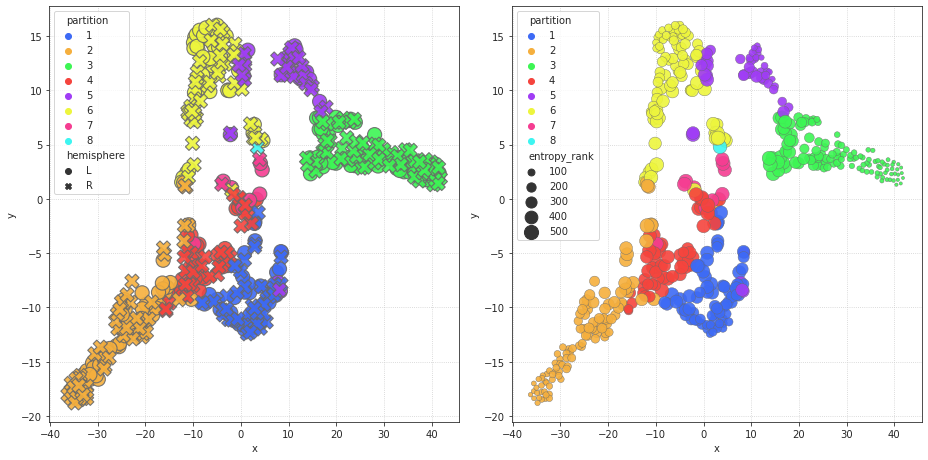

In [36]:
fig, axes = create_figure(1, 2, (13, 6.5), 'ticks')

_df = pd.DataFrame({
    'x': y_emb[:, 0],
    'y': y_emb[:, 1],
    'partition': 1 + np.argmax(pi_avg, axis=0),
    'hemisphere': hemis,
    'entropy': eh,
    'entropy_rank': ehr,
})
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='hemisphere',
    markers={'L': 'o', 'R': 'X'},
    palette=svinet.colors,
    s=200,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[0],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    size='entropy_rank',
    sizes=(10, 200),
    palette=svinet.colors,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[1],
)

for ax in axes.ravel():
    ax.grid()
plt.show()

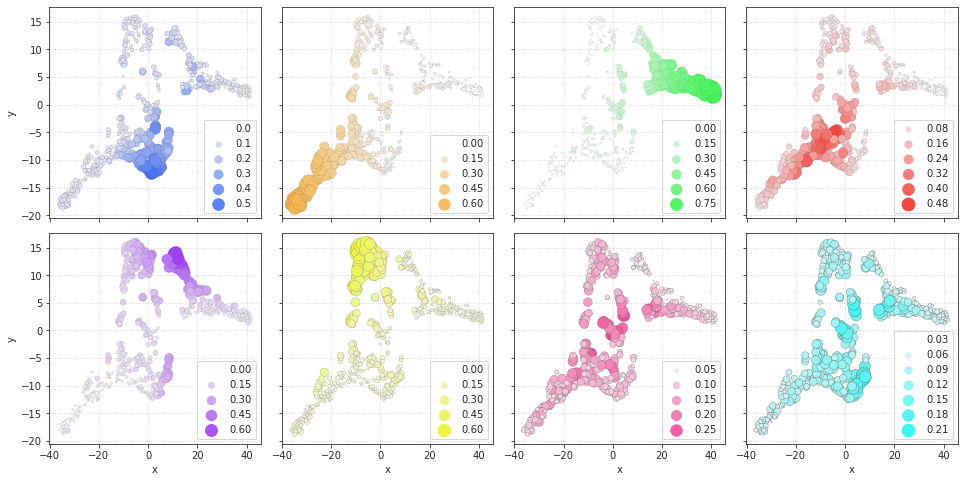

In [34]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 3.4 * nrows), 'ticks', 'all', 'all')

for i, ax in enumerate(axes.ravel()):
    if i == k:
        break

    _df = pd.DataFrame({
        'x': y_emb[:, 0],
        'y': y_emb[:, 1],
        'hemisphere': hemis,
        'strength': np.round(pi_avg[i, :], 2),
    })
    sns.scatterplot(
        data=_df,
        x='x',
        y='y',
        hue='strength',
        size='strength',
        sizes=(1, 160),
        palette=svinet.cmaps[i+1],
        s=120,
        edgecolor='dimgrey',
        ax=ax,
    )
    ax.legend(loc="lower right")
    ax.grid()
trim_axs(axes, k)
plt.show()

In [37]:
svinet.path = tmp_dir
svinet.best_qs = [0.65]

In [38]:
svinet.render(pi_avg, cortex_only=True)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/overlap_cortex_k8.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/disjoint_cortex_k8.html

In [39]:
svinet.render(pi_avg, cortex_only=False)

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/overlap_brain_k8.html

Scene saved at /home/hadi/Dropbox/git/jb-Ca-fMRI/tmp/render/disjoint_brain_k8.html

## k = 10

In [3]:
k = 10
p = 20
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
num_nodes = len(svinet.adj)

group_dir = get_svinet_group_dir(
    results_dir=mice.cfg.results_dir,
    k=k,
    p=p,
    graph_type=svinet_props.get('graph_type', 'real'),
)
print(group_dir)

/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-spatial-sym_n-404/results/SVINET/gr
oup_results/real-p20-k10

## Load group results

In [4]:
available = [
    e for e in os.listdir(group_dir)
    if '(0.2,1.0;4)' in e
]
file = sorted(available, key=sort_date_latest)[-1]
group = np.load(pjoin(group_dir, file), allow_pickle=True).item()

print(file)

group_bins(0.2,1.0;4)_(2021_09_19).npy

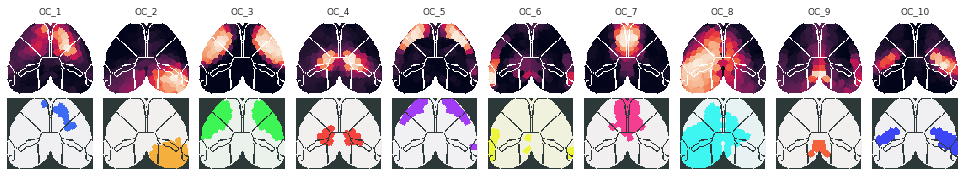

In [5]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(13.5, 2.5))

In [6]:
svinets = load_svinet_all(mice, k, p, **svinet_props)

  0%|          | 0/158 [00:00<?, ?it/s]

In [7]:
gam_aggr = collections.defaultdict(list)

for key, sv in svinets.items():
    try:
        sub, ses, run = mice.looper[key]
    except KeyError:
        sub, run = -1, -1
        ses = int(key.split('-')[1])
    if run == -1:
        continue

    x = np.nanmedian(sv.gam_all, 0)
    x = np.expand_dims(x, axis=0)
    gam_aggr[mice.get_key(sub, ses)].append(x)

gam_aggr = {key: np.concatenate(x) for key, x in gam_aggr.items()}

In [8]:
gam = np.empty((
    mice.cfg.num_subjects,
    mice.cfg.num_sessions,
    k, num_nodes,
))
for key, x in gam_aggr.items():
    sub, ses, _ = mice.looper[key]
    gam[sub - 1, ses - 1] = np.nanmean(x, 0)

gam_avg = np.nanmean(np.nanmean(gam, 1), 0)
pi_avg = gam_avg / np.nansum(gam_avg, 0, keepdims=True)

pi_avg.shape, gam_avg.shape, gam.shape

((10, 502), (10, 502), (10, 3, 10, 502))

In [9]:
group['gam'] = gam
group['gam_avg'] = gam_avg
group['pi_avg'] = pi_avg

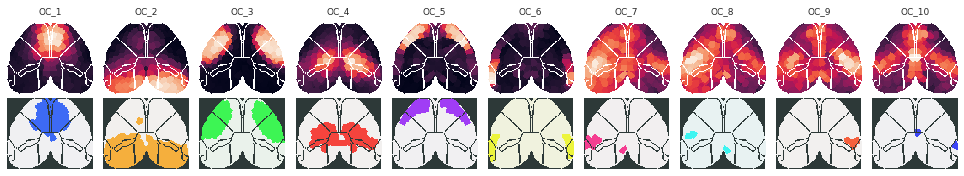

In [10]:
svinet = SVINET(mice, k, p, 'sub-SLC', verbose=False)
svinet.show(group['pi_avg'], figsize=(13.5, 2.5))

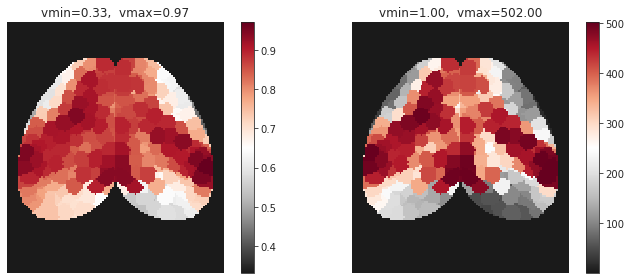

In [11]:
eh = entropy_expect_beta(gam_avg)
ehr = sp_stats.rankdata(eh)

fig, axes = create_figure(1, 2, (10, 4))

for i, ax in enumerate(axes.ravel()):
    data2plt = eh if i == 0 else ehr
    mask = svinet.pi2arr(data2plt.reshape(1, -1), cortex_only=True)[1]
    im = ax.imshow(mask, vmin=min(data2plt), vmax=max(data2plt), cmap='RdGy_r')
    plt.colorbar(im, ax=ax)
    ax.set_title(f"vmin={min(data2plt):0.2f},  vmax={max(data2plt):0.2f}")
remove_ticks(axes)

In [12]:
eh.shape

(502,)

In [13]:
l2h_sorted = dict(sorted(zip(svinet.l2n, eh), key=lambda x: x[1]))

In [14]:
l2h_sorted

{
    '1-315-294': 0.3315507157599804,
    '1-315-265': 0.35483281920872395,
    '1-315-284': 0.3560102611707464,
    '0-315-63': 0.36122188300604735,
    '1-315-281': 0.3725693599745034,
    '1-315-261': 0.38157299104088405,
    '1-315-285': 0.3867971395955111,
    '1-315-282': 0.38724727534430103,
    '1-315-267': 0.3950941139211265,
    '0-315-82': 0.39574539084003163,
    '0-315-48': 0.4077160335870915,
    '1-315-303': 0.4111887383973105,
    '0-315-61': 0.4113774407989493,
    '0-315-45': 0.4118526927603576,
    '1-315-302': 0.416062522134753,
    '1-315-283': 0.42034932337745473,
    '1-315-275': 0.42988477944891107,
    '1-315-301': 0.433055180838515,
    '1-315-263': 0.43418136558210396,
    '1-315-295': 0.4496104270687098,
    '0-315-80': 0.45272973993823407,
    '0-315-65': 0.4575497392669082,
    '0-315-83': 0.46386360357594836,
    '1-315-266': 0.46471734546557997,
    '1-315-257': 0.46528995724610556,
    '0-315-59': 0.46667083996081327,
    '0-315-101': 0.47010158038481026,
    '1-315-247': 0.47198383200778943,
    '0-315-79': 0.47779865444125463,
    '0-315-92': 0.480454914065182,
    '1-315-394': 0.4839642714192184,
    '1-315-248': 0.4839807990431879,
    '1-315-240': 0.48565149455595547,
    '1-315-313': 0.48726441104120966,
    '1-315-308': 0.48758506333509904,
    '1-315-250': 0.492492666302335,
    '0-315-46': 0.5000572303471637,
    '0-315-73': 0.5012289610344121,
    '1-315-317': 0.5059781888944548,
    '0-315-26': 0.5063055059820937,
    '0-315-93': 0.5254293797891395,
    '1-315-298': 0.5255390043345989,
    '1-315-260': 0.5277643423797027,
    '1-315-395': 0.5308272168671676,
    '0-315-106': 0.5334682405348663,
    '1-315-401': 0.5338454492150432,
    '0-315-96': 0.5361916571165856,
    '0-315-68': 0.536194214505227,
    '1-315-225': 0.5387553449993079,
    '1-315-390': 0.5467042136890659,
    '1-315-258': 0.5488206513669168,
    '1-315-384': 0.5513860044229557,
    '1-315-396': 0.552765008392045,
    '0-315-49': 0.5566776537423244,
    '1-315-230': 0.5604110068711496,
    '1-315-228': 0.5622349018058541,
    '1-315-399': 0.5695795817528908,
    '1-315-393': 0.5702298232714688,
    '0-315-43': 0.5706698046939525,
    '1-315-402': 0.5715781384989709,
    '1-315-404': 0.5807366749280262,
    '1-315-288': 0.58089258917929,
    '1-315-383': 0.5815511087350421,
    '0-315-184': 0.582560658897805,
    '0-315-28': 0.5829323306055594,
    '0-315-56': 0.5831154955564927,
    '0-315-100': 0.5844169948770606,
    '1-315-403': 0.5864695926737398,
    '1-315-244': 0.587274110532541,
    '1-315-245': 0.5905978952235695,
    '0-315-21': 0.5908632437224703,
    '0-315-42': 0.5921975810822162,
    '0-315-55': 0.5927636442301215,
    '0-315-16': 0.593663316569719,
    '0-315-11': 0.6029819002521571,
    '0-315-81': 0.6031247089181926,
    '0-703': 0.6032665872061082,
    '1-315-217': 0.6043084845337965,
    '1-339': 0.6069824895602459,
    '0-315-34': 0.6076244729301439,
    '0-315-172': 0.608062494351094,
    '0-315-23': 0.6089467880948559,
    '1-315-270': 0.6097164907800635,
    '0-315-32': 0.6123441275009766,
    '0-315-64': 0.6132851582684284,
    '1-315-400': 0.6148357360916323,
    '1-315-251': 0.6148731567258999,
    '1-315-392': 0.6152107352831602,
    '1-315-218': 0.6199928930976006,
    '1-315-377': 0.6208470399401805,
    '1-315-397': 0.6221163135891677,
    '0-315-52': 0.6221594991647899,
    '1-315-323': 0.6244676692664769,
    '1-315-380': 0.6267694584393436,
    '0-631': 0.6317834161875348,
    '1-315-223': 0.6323518012791414,
    '0-918': 0.632666334428362,
    '1-315-234': 0.6356467659193967,
    '1-315-213': 0.6369537666761352,
    '0-315-13': 0.637145017398072,
    '1-315-387': 0.6391131412390282,
    '1-315-221': 0.6398858410140144,
    '1-315-388': 0.6439197855199733,
    '0-315-192': 0.6442204340431908,
    '0-589508447': 0.6448255926773452,
    '1-315-209': 0.6458762759153979,
    '1-566': 0.6488934642898461,
    '0-788': 0.6520401863675546,
    '0-315-188': 0.6524166161789637,
    '1-315-233'

In [15]:
cortical_region_overlaps = mice.parcel.get_region_overlap()

  0%|          | 0/404 [00:00<?, ?it/s]

In [16]:
for region, val in l2h_sorted.items():
    if str(315) not in region:
        continue
    region_i = int(region.split('-')[-1])
    print(region, np.round(val, 3), cortical_region_overlaps[region_i])

1-315-294 0.332
{'SS': 100.0, 'SSs': 100.0}

1-315-265 0.355
{'SS': 87.0, 'SSp': 87.0, 'SSp-m': 87.0}

1-315-284 0.356
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-63 0.361
{'SS': 96.0, 'SSp': 96.0, 'SSp-m': 96.0}

1-315-281 0.373
{'SS': 100.0, 'SSs': 59.0, 'SSp': 41.0, 'SSp-m': 41.0}

1-315-261 0.382
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-285 0.387
{'SS': 100.0, 'SSs': 90.0}

1-315-282 0.387
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 83.0}

1-315-267 0.395
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-82 0.396
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-48 0.408
{'MO': 99.0, 'MOp': 99.0}

1-315-303 0.411
{'SS': 100.0, 'SSs': 96.0}

0-315-61 0.411
{'MO': 96.0, 'MOp': 96.0}

0-315-45 0.412
{'MO': 100.0, 'MOp': 91.0}

1-315-302 0.416
{'VISC': 69.0, 'SS': 30.0, 'SSs': 30.0}

1-315-283 0.42
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 90.0}

1-315-275 0.43
{'SS': 56.0, 'SSs': 56.0, 'GU': 34.0}

1-315-301 0.433
{'SS': 100.0, 'SSs': 71.0, 'SSp': 29.0, 'SSp-n': 25.0}

1-315-263 0.434
{'MO': 100.0, 'MOp': 100.0}

1-315-295 0.45
{'GU': 35.0, 'VISC': 33.0, 'SS': 32.0, 'SSs': 32.0}

0-315-80 0.453
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 96.0}

0-315-65 0.458
{'SS': 100.0, 'SSp': 98.0, 'SSp-m': 98.0}

0-315-83 0.464
{'SS': 100.0, 'SSs': 95.0}

1-315-266 0.465
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-257 0.465
{'SS': 85.0, 'SSp': 58.0, 'SSp-m': 58.0, 'SSs': 26.0}

0-315-59 0.467
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

0-315-101 0.47
{'SS': 100.0, 'SSs': 100.0}

1-315-247 0.472
{'MO': 100.0, 'MOp': 80.0}

0-315-79 0.478
{'SS': 100.0, 'SSs': 66.0, 'SSp': 34.0, 'SSp-m': 34.0}

0-315-92 0.48
{'SS': 100.0, 'SSs': 100.0}

1-315-394 0.484
{'VIS': 65.0, 'RSP': 35.0}

1-315-248 0.484
{'MO': 54.0, 'MOp': 54.0, 'SS': 46.0, 'SSp': 46.0, 'SSp-m': 46.0}

1-315-240 0.486
{'MO': 100.0, 'MOp': 100.0}

1-315-313 0.487
{'SS': 100.0, 'SSs': 100.0}

1-315-308 0.488
{'SS': 100.0, 'SSp': 89.0, 'SSp-n': 89.0}

1-315-250 0.492
{'MO': 100.0, 'MOp': 100.0}

0-315-46 0.5
{'SS': 58.0, 'SSp': 58.0, 'SSp-m': 58.0, 'MO': 42.0, 'MOp': 42.0}

0-315-73 0.501
{'SS': 60.0, 'SSs': 60.0, 'GU': 28.0}

1-315-317 0.506
{'SS': 62.0, 'SSs': 62.0, 'VISC': 38.0}

0-315-26 0.506
{'MO': 100.0, 'MOs': 59.0, 'MOp': 41.0}

0-315-93 0.525
{'VISC': 36.0, 'SS': 32.0, 'SSs': 32.0, 'GU': 32.0}

1-315-298 0.526
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 86.0}

1-315-260 0.528
{'SS': 57.0, 'SSp': 57.0, 'SSp-m': 51.0, 'MO': 42.0, 'MOp': 42.0}

1-315-395 0.531
{'VIS': 100.0}

0-315-106 0.533
{'SS': 100.0, 'SSp': 81.0, 'SSp-n': 81.0}

1-315-401 0.534
{'RSP': 52.0, 'VIS': 48.0}

0-315-96 0.536
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 93.0}

0-315-68 0.536
{'GU': 80.0}

1-315-225 0.539
{'MO': 100.0, 'MOp': 100.0}

1-315-390 0.547
{'RSP': 100.0}

1-315-258 0.549
{'AI': 100.0}

1-315-384 0.551
{'VIS': 100.0}

1-315-396 0.553
{'VIS': 100.0}

0-315-49 0.557
{'AI': 53.0, 'GU': 45.0}

1-315-230 0.56
{'AI': 96.0}

1-315-228 0.562
{'MO': 100.0, 'MOs': 73.0, 'MOp': 27.0}

1-315-399 0.57
{'RSP': 75.0, 'VIS': 25.0}

1-315-393 0.57
{'RSP': 85.0}

0-315-43 0.571
{'AI': 100.0}

1-315-402 0.572
{'VIS': 100.0}

1-315-404 0.581
{'VIS': 100.0}

1-315-288 0.581
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 68.0, 'SSp-m': 32.0}

1-315-383 0.582
{'VIS': 100.0}

0-315-184 0.583
{'ECT': 61.0, 'PERI': 26.0}

0-315-28 0.583
{'AI': 92.0}

0-315-56 0.583
{'AI': 100.0}

0-315-100 0.584
{'VISC': 69.0, 'SS': 31.0, 'SSs': 31.0}

1-315-403 0.586
{'VIS': 78.0, 'RSP': 22.0}

1-315-244 0.587
{'MO': 60.0, 'MOp': 60.0, 'SS': 40.0, 'SSp': 40.0, 'SSp-m': 40.0}

1-315-245 0.591
{'AI': 100.0}

0-315-21 0.591
{'MO': 99.0, 'MOp': 99.0}

0-315-42 0.592
{'SS': 52.0, 'SSp': 52.0, 'SSp-m': 52.0, 'MO': 48.0, 'MOp': 48.0}

0-315-55 0.593
{'SS': 88.0, 'SSp': 50.0, 'SSp-m': 50.0, 'SSs': 38.0}

0-315-16 0.594
{'AI': 86.0}

0-315-11 0.603
{'AI': 74.0, 'MO': 26.0, 'MOs': 24.0}

0-315-81 0.603
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 88.0}

1-315-217 0.604
{'MO': 100.0, 'MOs': 99.0}

0-315-34 0.608
{'MO': 100.0, 'MOs': 100.0}

0-315-172 0.608
{'ECT': 71.0}

0-315-23 0.609
{'MO': 100.0, 'MOp': 100.0}

1-315-270 0.61
{'GU': 75.0, 'AI': 25.0}

0-315-32 0.612
{'AI': 100.0}

0-315-64 0.613
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 100.0}

1-315-400 0.615
{'VIS': 100.0}

1-315-251 0.615
{'AI': 61.0, 'GU': 37.0}

1-315-392 0.615
{'VIS': 100.0}

1-315-218 0.62
{'AI': 72.0, 'ORB': 28.0}

1-315-377 0.621
{'RSP': 100.0}

1-315-397 0.622
{'VIS': 100.0}

0-315-52 0.622
{'AI': 35.0, 'MO': 33.0, 'MOp': 33.0, 'GU': 29.0}

1-315-323 0.624
{'SS': 100.0, 'SSs': 100.0}

1-315-380 0.627
{'VIS': 56.0, 'RSP': 44.0}

1-315-223 0.632
{'MO': 97.0, 'MOp': 97.0}

1-315-234 0.636
{'AI': 100.0}

1-315-213 0.637
{'AI': 83.0}

0-315-13 0.637
{'ORB': 89.0}

1-315-387 0.639
{'VIS': 100.0}

1-315-221 0.64
{'MO': 59.0, 'MOs': 59.0, 'ORB': 23.0}

1-315-388 0.644
{'VIS': 100.0}

0-315-192 0.644
{'VIS': 81.0}

1-315-209 0.646
{'MO': 100.0, 'MOs': 100.0}

0-315-188 0.652
{'RSP': 100.0}

1-315-233 0.654
{'MO': 100.0, 'MOs': 72.0, 'MOp': 28.0}

0-315-99 0.654
{'SS': 100.0, 'SSs': 80.0}

0-315-7 0.658
{'MO': 100.0, 'MOs': 100.0}

0-315-39 0.659
{'AI': 65.0, 'MO': 35.0, 'MOp': 34.0}

1-315-279 0.659
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 61.0, 'SSp-ul': 23.0}

1-315-215 0.66
{'ORB': 98.0}

1-315-370 0.661
{'VIS': 100.0}

0-315-175 0.669
{'RSP': 100.0}

1-315-252 0.672
{'MO': 100.0, 'MOp': 100.0}

1-315-321 0.675
{'SS': 100.0, 'SSs': 98.0}

0-315-15 0.675
{'MO': 100.0, 'MOs': 93.0}

1-315-276 0.676
{'AI': 95.0}

1-315-368 0.676
{'VIS': 100.0}

1-315-254 0.68
{'AI': 43.0, 'MO': 38.0, 'MOp': 38.0}

1-315-381 0.681
{'RSP': 100.0}

1-315-379 0.682
{'VIS': 90.0}

0-315-194 0.686
{'VIS': 100.0}

0-315-178 0.688
{'VIS': 78.0, 'RSP': 22.0}

0-315-54 0.69
{'MO': 100.0, 'MOp': 66.0, 'MOs': 34.0}

0-315-111 0.691
{'SS': 100.0, 'SSs': 100.0}

0-315-191 0.692
{'RSP': 74.0, 'VIS': 26.0}

0-315-115 0.695
{'SS': 60.0, 'SSs': 60.0, 'VISC': 40.0}

0-315-193 0.696
{'VIS': 100.0}

0-315-160 0.697
{'ECT': 83.0}

0-315-19 0.701
{'MO': 73.0, 'MOs': 73.0}

0-315-3 0.702
{'MO': 90.0, 'MOs': 90.0}

0-315-38 0.703
{'MO': 100.0, 'MOp': 100.0}

0-315-197 0.704
{'RSP': 61.0, 'VIS': 39.0}

0-315-186 0.704
{'VIS': 100.0}

1-315-304 0.706
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

0-315-199 0.709
{'VIS': 59.0, 'RSP': 41.0}

1-315-324 0.711
{'VISC': 78.0, 'SS': 22.0, 'SSs': 22.0}

0-315-72 0.711
{'MO': 85.0, 'MOp': 85.0}

1-315-208 0.711
{'ORB': 47.0, 'AI': 34.0}

0-315-200 0.712
{'VIS': 100.0}

1-315-398 0.713
{'VIS': 79.0, 'TEa': 21.0}

0-315-182 0.713
{'VIS': 100.0}

0-315-58 0.716
{'SS': 72.0, 'SSp': 72.0, 'SSp-m': 68.0, 'MO': 28.0, 'MOp': 28.0}

0-315-201 0.717
{'VIS': 90.0}

1-315-376 0.72
{'AUD': 81.0}

1-315-391 0.721
{'TEa': 61.0, 'VIS': 39.0}

0-315-121 0.723
{'SS': 100.0, 'SSs': 100.0}

1-315-371 0.724
{'VIS': 54.0, 'PTLp': 46.0}

0-315-190 0.725
{'VIS': 100.0}

1-315-241 0.725
{'AI': 75.0, 'MO': 25.0, 'MOp': 23.0}

1-315-262 0.726
{'MO': 60.0, 'MOs': 60.0, 'ACA': 40.0}

1-315-389 0.728
{'TEa': 58.0, 'ECT': 38.0}

0-315-74 0.73
{'AI': 93.0}

1-315-322 0.732
{'VISC': 72.0, 'AI': 28.0}

0-315-6 0.733
{'AI': 46.0, 'ORB': 30.0, 'MO': 24.0, 'MOs': 24.0}

1-315-374 0.733
{'ECT': 73.0}

0-315-86 0.734
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 71.0, 'SSp-m': 29.0}

0-315-181 0.736
{'VIS': 100.0}

1-315-232 0.736
{'ACA': 77.0, 'MO': 23.0, 'MOs': 23.0}

1-315-269 0.739
{'SS': 62.0, 'SSp': 62.0, 'SSp-ul': 62.0, 'MO': 38.0, 'MOp': 38.0}

0-315-185 0.739
{'VIS': 100.0}

1-315-386 0.74
{'ECT': 61.0, 'PERI': 28.0}

1-315-255 0.74
{'ACA': 100.0}

1-315-375 0.74
{'VIS': 84.0}

1-315-239 0.741
{'MO': 90.0, 'MOs': 90.0}

0-315-202 0.742
{'VIS': 100.0}

0-315-198 0.742
{'VIS': 100.0}

0-315-195 0.744
{'VIS': 100.0}

0-315-27 0.747
{'AI': 46.0, 'ORB': 28.0, 'MO': 25.0, 'MOs': 25.0}

0-315-53 0.747
{'ACA': 98.0}

1-315-296 0.748
{'AI': 89.0}

1-315-329 0.753
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 59.0, 'SSp-ll': 41.0}

1-315-205 0.753
{'MO': 78.0, 'MOs': 78.0, 'FRP': 22.0}

1-315-274 0.754
{'MO': 91.0, 'MOp': 91.0}

0-315-4 0.754
{'ORB': 65.0, 'FRP': 35.0}

1-315-357 0.757
{'PTLp': 86.0}

1-315-242 0.759
{'PL': 80.0, 'ACA': 20.0}

1-315-220 0.761
{'MO': 43.0, 'MOs': 43.0, 'PL': 34.0}

1-315-352 0.761
{'VIS': 54.0, 'PTLp': 29.0}

0-315-110 0.763
{'SS': 92.0, 'SSp': 92.0, 'SSp-ll': 92.0}

1-315-243 0.763
{'PL': 71.0, 'ACA': 23.0}

0-315-40 0.764
{'PL': 76.0, 'ACA': 24.0}

1-315-231 0.766
{'MO': 100.0, 'MOs': 100.0}

0-315-143 0.766
{'ECT': 37.0, 'AI': 26.0, 'PERI': 25.0}

1-315-238 0.766
{'ORB': 100.0}

1-315-382 0.768
{'VIS': 100.0}

1-315-353 0.769
{'PTLp': 62.0, 'SS': 38.0, 'SSp': 38.0, 'SSp-bfd': 38.0}

1-315-211 0.769
{'MO': 100.0, 'MOs': 100.0}

0-315-177 0.77
{'VIS': 93.0}

0-315-179 0.77
{'RSP': 100.0}

1-315-314 0.771
{'AI': 92.0}

1-315-236 0.772
{'MO': 100.0, 'MOs': 100.0}

0-315-166 0.772
{'VIS': 100.0}

1-315-256 0.777
{'MO': 100.0, 'MOp': 50.0, 'MOs': 50.0}

0-315-189 0.779
{'TEa': 72.0, 'VIS': 28.0}

1-315-359 0.779
{'SS': 52.0, 'SSp': 52.0, 'SSp-bfd': 52.0, 'PTLp': 42.0}

1-315-328 0.781
{'SS': 93.0, 'SSp': 93.0, 'SSp-tr': 90.0}

0-315-30 0.782
{'ACA': 64.0, 'MO': 36.0, 'MOs': 36.0}

1-315-318 0.782
{'MO': 68.0, 'MOp': 34.0, 'MOs': 34.0, 'RSP': 27.0}

1-315-216 0.783
{'PL': 92.0}

1-315-278 0.785
{'MO': 75.0, 'MOs': 70.0, 'ACA': 25.0}

0-315-90 0.786
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

1-315-235 0.787
{'MO': 100.0, 'MOs': 99.0}

0-315-70 0.788
{'ACA': 74.0, 'MO': 26.0, 'MOs': 26.0}

0-315-127 0.79
{'SS': 100.0, 'SSp': 100.0, 'SSp-tr': 52.0, 'SSp-ll': 48.0}

1-315-312 0.792
{'SS': 82.0, 'SSp': 82.0, 'SSp-ll': 82.0}

0-315-196 0.793
{'VIS': 71.0, 'TEa': 28.0}

0-315-36 0.795
{'ORB': 94.0}

1-315-336 0.796
{'SS': 84.0, 'SSp': 84.0, 'SSp-tr': 79.0}

0-315-62 0.796
{'ACA': 100.0}

0-315-1 0.796
{'MO': 88.0, 'MOs': 88.0}

1-315-320 0.797
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 74.0, 'SSp-n': 26.0}

1-315-299 0.797
{'MO': 87.0, 'MOs': 52.0, 'MOp': 34.0}

1-315-203 0.797
{'MO': 85.0, 'MOs': 85.0}

0-315-76 0.797
{'MO': 88.0, 'MOs': 72.0}

0-315-31 0.798
{'MO': 100.0, 'MOs': 57.0, 'MOp': 43.0}

0-315-141 0.8
{'VISC': 48.0, 'ECT': 30.0, 'TEa': 22.0}

1-315-292 0.801
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

1-315-229 0.801
{'ORB': 42.0, 'AI': 39.0}

1-315-365 0.802
{'RSP': 100.0}

0-315-97 0.803
{'MO': 95.0, 'MOp': 55.0, 'MOs': 40.0}

0-315-14 0.803
{'PL': 87.0}

0-315-10 0.804
{'ORB': 100.0}

1-315-210 0.804
{'MO': 92.0, 'MOs': 92.0}

0-315-187 0.804
{'TEa': 60.0, 'ECT': 36.0}

1-315-219 0.806
{'MO': 100.0, 'MOs': 100.0}

0-315-174 0.806
{'AUD': 86.0}

1-315-346 0.806
{'PTLp': 79.0, 'SS': 20.0, 'SSp': 20.0, 'SSp-tr': 20.0}

1-315-206 0.808
{'ORB': 73.0, 'FRP': 27.0}

0-315-168 0.808
{'VIS': 100.0}

1-315-315 0.809
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 89.0}

1-315-350 0.809
{'RSP': 100.0}

1-315-212 0.809
{'ORB': 100.0}

0-315-150 0.81
{'VIS': 59.0, 'PTLp': 38.0}

0-315-77 0.813
{'SS': 100.0, 'SSp': 100.0, 'SSp-m': 70.0}

0-315-155 0.813
{'PTLp': 90.0}

0-315-149 0.814
{'TEa': 93.0}

1-315-272 0.815
{'ACA': 83.0}

1-315-305 0.815
{'SS': 68.0, 'SSp': 68.0, 'SSp-ll': 68.0, 'MO': 32.0, 'MOp': 32.0}

1-315-385 0.817
{'AUD': 67.0, 'TEa': 33.0}

0-315-173 0.817
{'VIS': 74.0, 'AUD': 26.0}

0-315-78 0.817
{'ACA': 100.0}

0-315-183 0.82
{'AUD': 71.0, 'TEa': 29.0}

0-315-125 0.82
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 59.0, 'SSp-un': 27.0}

1-315-347 0.821
{'SS': 68.0, 'SSp': 68.0, 'SSp-bfd': 46.0, 'PTLp': 32.0, 'SSp-tr': 21.0}

1-315-326 0.823
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 61.0, 'SSp-un': 33.0}

1-315-226 0.823
{'PL': 63.0}

0-315-151 0.825
{'PTLp': 52.0, 'SS': 48.0, 'SSp': 48.0, 'SSp-bfd': 48.0}

0-315-24 0.826
{'PL': 59.0, 'ORB': 25.0}

0-315-169 0.826
{'PTLp': 58.0, 'VIS': 42.0}

0-315-126 0.827
{'SS': 95.0, 'SSp': 95.0, 'SSp-tr': 90.0}

0-315-118 0.827
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 73.0, 'SSp-n': 27.0}

1-315-246 0.827
{'MO': 100.0, 'MOs': 100.0}

1-315-273 0.827
{'MO': 100.0, 'MOp': 88.0}

0-315-37 0.828
{'MO': 97.0, 'MOs': 97.0}

0-315-9 0.829
{'MO': 100.0, 'MOs': 100.0}

0-315-108 0.831
{'ACA': 64.0, 'MO': 30.0, 'MOs': 30.0}

0-315-163 0.831
{'RSP': 100.0}

0-315-157 0.831
{'SS': 56.0, 'SSp': 56.0, 'SSp-bfd': 56.0, 'PTLp': 34.0}

1-315-327 0.833
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 28.0}

0-315-47 0.836
{'PL': 46.0, 'ACA': 35.0}

0-315-41 0.836
{'PL': 59.0, 'ACA': 26.0}

0-315-60 0.837
{'MO': 76.0, 'MOs': 76.0, 'ACA': 24.0}

0-315-133 0.837
{'AI': 98.0}

0-315-116 0.838
{'MO': 66.0, 'MOp': 38.0, 'MOs': 28.0, 'RSP': 21.0}

0-315-148 0.84
{'RSP': 100.0}

1-315-264 0.841
{'ACA': 100.0}

1-315-338 0.841
{'SS': 89.0, 'SSs': 89.0}

0-315-18 0.843
{'MO': 54.0, 'MOs': 54.0, 'PL': 23.0}

0-315-122 0.844
{'VISC': 80.0}

0-315-134 0.844
{'SS': 85.0, 'SSp': 85.0, 'SSp-tr': 78.0}

1-315-344 0.844
{'RSP': 92.0}

0-315-94 0.844
{'AI': 86.0}

1-315-222 0.844
{'ORB': 88.0}

0-315-12 0.847
{'ORB': 100.0}

1-315-325 0.847
{'RSP': 93.0}

0-315-180 0.848
{'VIS': 100.0}

1-315-309 0.848
{'MO': 66.0, 'MOs': 60.0, 'RSP': 34.0}

1-315-364 0.848
{'RSP': 99.0}

0-315-114 0.851
{'ACA': 62.0, 'RSP': 38.0}

0-315-51 0.852
{'MO': 100.0, 'MOs': 100.0}

1-315-249 0.852
{'PL': 44.0, 'ACA': 39.0}

1-315-253 0.852
{'MO': 99.0, 'MOs': 99.0}

1-315-280 0.853
{'ACA': 100.0}

0-315-91 0.853
{'ACA': 100.0}

1-315-334 0.854
{'SS': 100.0, 'SSs': 84.0}

0-315-130 0.854
{'RSP': 100.0}

1-315-300 0.855
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 56.0, 'SSp-un': 31.0}

0-315-123 0.855
{'RSP': 80.0}

0-315-112 0.857
{'AI': 89.0}

0-315-102 0.857
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 95.0}

1-315-310 0.857
{'ACA': 72.0}

0-315-103 0.857
{'SS': 84.0, 'SSp': 84.0, 'SSp-ll': 84.0}

0-315-85 0.857
{'MO': 61.0, 'MOs': 61.0, 'ACA': 39.0}

0-315-50 0.858
{'MO': 100.0, 'MOp': 100.0}

0-315-35 0.858
{'ILA': 86.0}

0-315-145 0.859
{'SS': 75.0, 'SSp': 75.0, 'SSp-bfd': 59.0, 'PTLp': 25.0}

1-315-355 0.859
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-286 0.86
{'MO': 100.0, 'MOp': 100.0}

1-315-339 0.861
{'SS': 65.0, 'SSs': 65.0, 'VISC': 32.0}

0-315-159 0.861
{'AUD': 56.0, 'TEa': 44.0}

1-315-271 0.861
{'MO': 100.0, 'MOs': 100.0}

0-315-135 0.862
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-362 0.863
{'ECT': 87.0}

1-315-345 0.864
{'ECT': 35.0, 'AI': 30.0, 'PERI': 23.0}

1-315-287 0.865
{'MO': 52.0, 'MOs': 52.0, 'ACA': 48.0}

0-315-8 0.865
{'MO': 98.0, 'MOs': 98.0}

0-315-124 0.865
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 76.0, 'SSp-un': 22.0}

1-315-259 0.867
{'MO': 100.0, 'MOp': 99.0}

1-315-332 0.867
{'RSP': 100.0}

0-315-171 0.867
{'AUD': 63.0, 'TEa': 37.0}

1-315-335 0.868
{'AI': 98.0}

0-315-107 0.868
{'MO': 68.0, 'MOs': 53.0, 'RSP': 32.0}

0-315-120 0.868
{'VISC': 78.0, 'AI': 22.0}

1-315-204 0.868
{'PL': 57.0, 'FRP': 40.0}

0-315-162 0.87
{'RSP': 89.0}

1-315-366 0.87
{'VIS': 100.0}

0-315-5 0.871
{'ORB': 98.0}

0-315-20 0.871
{'ORB': 92.0}

0-315-161 0.872
{'AUD': 100.0}

0-315-25 0.872
{'ORB': 100.0}

1-315-290 0.872
{'MO': 100.0, 'MOs': 55.0, 'MOp': 45.0}

0-315-138 0.872
{'SS': 100.0, 'SSp': 95.0, 'SSp-bfd': 95.0}

0-315-144 0.872
{'PTLp': 78.0, 'SS': 22.0, 'SSp': 22.0, 'SSp-tr': 22.0}

1-315-237 0.874
{'ILA': 93.0}

0-315-67 0.875
{'SS': 68.0, 'SSp': 68.0, 'SSp-ul': 68.0, 'MO': 32.0, 'MOp': 32.0}

0-315-89 0.877
{'MO': 59.0, 'MOp': 59.0, 'SS': 41.0, 'SSp': 41.0, 'SSp-ll': 21.0, 'SSp-ul': 21.0}

0-315-104 0.877
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 98.0}

1-315-227 0.879
{'ORB': 100.0}

1-315-337 0.881
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-119 0.882
{'SS': 100.0, 'SSs': 99.0}

0-315-164 0.882
{'VIS': 100.0}

0-315-132 0.882
{'SS': 100.0, 'SSs': 91.0}

1-315-214 0.882
{'ORB': 100.0}

0-315-22 0.882
{'ORB': 88.0}

1-315-224 0.883
{'ORB': 83.0}

0-315-113 0.884
{'SS': 100.0, 'SSp': 100.0, 'SSp-ll': 74.0, 'SSp-ul': 26.0}

1-315-297 0.884
{'SS': 99.0, 'SSp': 99.0, 'SSp-ll': 61.0, 'SSp-ul': 38.0}

1-315-307 0.885
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 54.0, 'SSp-bfd': 30.0}

1-315-268 0.886
{'MO': 100.0, 'MOp': 52.0, 'MOs': 48.0}

1-315-207 0.886
{'ORB': 98.0}

0-315-29 0.888
{'MO': 100.0, 'MOs': 100.0}

1-315-340 0.888
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

0-315-71 0.889
{'MO': 100.0, 'MOp': 98.0}

0-315-158 0.889
{'SS': 64.0, 'SSs': 62.0, 'AUD': 36.0}

0-315-146 0.889
{'SS': 81.0, 'SSs': 81.0}

1-315-316 0.89
{'ACA': 59.0, 'RSP': 41.0}

0-315-69 0.89
{'MO': 100.0, 'MOs': 98.0}

1-315-331 0.891
{'SS': 100.0, 'SSp': 90.0, 'SSp-bfd': 90.0}

0-315-2 0.891
{'FRP': 51.0, 'PL': 43.0}

0-315-131 0.891
{'RSP': 100.0}

0-315-105 0.892
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 36.0}

1-315-289 0.892
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 99.0}

0-315-139 0.892
{'SS': 100.0, 'SSp': 92.0, 'SSp-bfd': 92.0}

1-315-291 0.892
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0}

0-315-33 0.893
{'MO': 100.0, 'MOs': 91.0}

0-315-128 0.893
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-170 0.895
{'AUD': 100.0}

1-315-360 0.895
{'SS': 74.0, 'SSs': 64.0, 'AUD': 26.0}

1-315-293 0.897
{'ACA': 100.0}

0-315-153 0.898
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-176 0.899
{'RSP': 100.0}

0-315-142 0.899
{'RSP': 78.0}

0-315-117 0.9
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-277 0.9
{'MO': 82.0, 'MOp': 82.0}

1-315-349 0.901
{'AUD': 66.0, 'SS': 34.0, 'SSs': 34.0}

0-315-88 0.902
{'MO': 100.0, 'MOp': 64.0, 'MOs': 36.0}

1-315-341 0.905
{'SS': 100.0, 'SSp': 98.0, 'SSp-bfd': 98.0}

0-315-95 0.907
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 55.0, 'SSp-ll': 45.0}

1-315-330 0.907
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

0-315-129 0.908
{'SS': 100.0, 'SSp': 82.0, 'SSp-bfd': 82.0}

1-315-343 0.911
{'VISC': 52.0, 'ECT': 29.0}

0-315-156 0.911
{'AUD': 99.0}

0-315-109 0.913
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 46.0, 'SSp-bfd': 31.0, 'SSp-ul': 23.0}

0-315-66 0.914
{'MO': 100.0, 'MOp': 71.0, 'MOs': 29.0}

0-315-137 0.914
{'SS': 62.0, 'SSs': 62.0, 'VISC': 35.0}

0-315-44 0.915
{'MO': 100.0, 'MOs': 100.0}

0-315-98 0.915
{'SS': 100.0, 'SSp': 100.0, 'SSp-n': 69.0}

0-315-17 0.915
{'MO': 100.0, 'MOs': 100.0}

1-315-358 0.915
{'AUD': 96.0}

1-315-333 0.916
{'RSP': 100.0}

0-315-140 0.917
{'SS': 55.0, 'SSs': 55.0, 'AUD': 45.0}

0-315-84 0.917
{'MO': 98.0, 'MOp': 98.0}

1-315-378 0.917
{'RSP': 100.0}

1-315-361 0.918
{'AUD': 59.0, 'TEa': 41.0}

1-315-311 0.919
{'SS': 100.0, 'SSp': 100.0, 'SSp-un': 44.0, 'SSp-ul': 37.0}

1-315-363 0.919
{'AUD': 100.0}

0-315-152 0.92
{'RSP': 100.0}

0-315-147 0.924
{'AUD': 72.0, 'SS': 28.0, 'SSs': 28.0}

0-315-57 0.928
{'MO': 100.0, 'MOp': 100.0}

1-315-342 0.928
{'SS': 58.0, 'SSs': 58.0, 'AUD': 42.0}

0-315-87 0.929
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 95.0}

1-315-373 0.93
{'AUD': 64.0, 'TEa': 36.0}

1-315-306 0.93
{'SS': 100.0, 'SSp': 100.0, 'SSp-ul': 90.0}

0-315-167 0.933
{'RSP': 100.0}

1-315-351 0.936
{'TEa': 93.0}

1-315-319 0.939
{'SS': 100.0, 'SSp': 100.0, 'SSp-bfd': 100.0}

1-315-369 0.939
{'RSP': 100.0}

0-315-154 0.939
{'AUD': 100.0}

1-315-354 0.941
{'RSP': 100.0}

0-315-165 0.941
{'RSP': 100.0}

1-315-367 0.943
{'RSP': 100.0}

0-315-75 0.948
{'MO': 72.0, 'MOp': 72.0, 'SS': 28.0, 'SSp': 28.0, 'SSp-ul': 26.0}

1-315-348 0.949
{'SS': 88.0, 'SSs': 87.0}

0-315-136 0.949
{'SS': 88.0, 'SSs': 88.0}

1-315-372 0.951
{'AUD': 100.0}

1-315-356 0.971
{'AUD': 100.0}

In [17]:
sub_cortical = []
for lbl in svinet.l2n:
    if str(315) not in lbl and str(0) in lbl:
        sub_cortical.append(int(lbl.split('-')[-1]))
sub_cortical = mice.allen['structure_tree'].get_structures_by_id(sub_cortical)

In [18]:
for region, val in l2h_sorted.items():
    if str(315) in region:
        continue
    region_i = int(region.split('-')[-1])
    struct = next(e for e in sub_cortical if e['id'] == region_i)
    print(region, np.round(val, 3), f"{struct['acronym']} ({struct['name']})")

0-703 0.603 CTXsp (Cortical subplate)

1-339 0.607 MBsen (Midbrain, sensory related)

0-631 0.632 COA (Cortical amygdalar area)

0-918 0.633 ENTl (Entorhinal area, lateral part)

0-589508447 0.645 HATA (Hippocampo-amygdalar transition area)

1-566 0.649 TR (Postpiriform transition area)

0-788 0.652 PAA (Piriform-amygdalar area)

0-375 0.66 CA (Ammon's horn)

0-278 0.676 sAMY (Striatum-like amygdalar nuclei)

0-1097 0.682 HY (Hypothalamus)

1-987 0.686 P-mot (Pons, motor related)

0-619 0.688 NLOT (Nucleus of the lateral olfactory tract)

0-961 0.692 PIR (Piriform area)

0-835 0.694 PALv (Pallidum, ventral region)

1-631 0.699 COA (Cortical amygdalar area)

0-566 0.7 TR (Postpiriform transition area)

0-987 0.701 P-mot (Pons, motor related)

0-726 0.707 DG (Dentate gyrus)

0-339 0.708 MBsen (Midbrain, sensory related)

0-484682470 0.708 ProS (Prosubiculum)

1-589508447 0.708 HATA (Hippocampo-amygdalar transition area)

1-1007 0.713 SIM (Simple lobule)

1-788 0.714 PAA (Piriform-amygdalar area)

0-1132 0.715 P-sen (Pons, sensory related)

0-826 0.719 PALm (Pallidum, medial region)

1-278 0.728 sAMY (Striatum-like amygdalar nuclei)

1-484682508 0.73 APr (Area prostriata)

1-159 0.732 AON (Anterior olfactory nucleus)

1-1097 0.735 HY (Hypothalamus)

0-502 0.736 SUB (Subiculum)

0-493 0.738 STRv (Striatum ventral region)

1-619 0.74 NLOT (Nucleus of the lateral olfactory tract)

0-1049 0.741 FL (Flocculus)

0-1084 0.744 PRE (Presubiculum)

0-843 0.744 PAR (Parasubiculum)

0-926 0.744 ENTm (Entorhinal area, medial part, dorsal zone)

0-348 0.746 MBsta (Midbrain, behavioral state related)

1-1132 0.748 P-sen (Pons, sensory related)

1-703 0.749 CTXsp (Cortical subplate)

0-1117 0.751 P-sat (Pons, behavioral state related)

0-159 0.755 AON (Anterior olfactory nucleus)

1-1117 0.756 P-sat (Pons, behavioral state related)

0-386 0.759 MY-sen (Medulla, sensory related)

1-918 0.76 ENTl (Entorhinal area, lateral part)

1-645 0.764 VERM (Vermal regions)

1-493 0.765 STRv (Striatum ventral region)

1-484682470 0.766 ProS (Prosubiculum)

0-1041 0.767 PFL (Paraflocculus)

0-645 0.769 VERM (Vermal regions)

0-1007 0.771 SIM (Simple lobule)

0-370 0.774 MY-mot (Medulla, motor related)

1-835 0.776 PALv (Pallidum, ventral region)

1-348 0.777 MBsta (Midbrain, behavioral state related)

0-1017 0.783 AN (Ansiform lobule)

0-484682508 0.786 APr (Area prostriata)

0-323 0.787 MBmot (Midbrain, motor related)

1-961 0.787 PIR (Piriform area)

1-370 0.787 MY-mot (Medulla, motor related)

1-826 0.796 PALm (Pallidum, medial region)

1-375 0.802 CA (Ammon's horn)

1-1017 0.807 AN (Ansiform lobule)

1-726 0.809 DG (Dentate gyrus)

1-926 0.81 ENTm (Entorhinal area, medial part, dorsal zone)

0-1025 0.825 PRM (Paramedian lobule)

1-323 0.827 MBmot (Midbrain, motor related)

1-507 0.83 MOB (Main olfactory bulb)

1-1084 0.832 PRE (Presubiculum)

1-843 0.835 PAR (Parasubiculum)

1-386 0.839 MY-sen (Medulla, sensory related)

0-1033 0.84 COPY (Copula pyramidis)

1-502 0.84 SUB (Subiculum)

0-589 0.843 TT (Taenia tecta)

0-507 0.849 MOB (Main olfactory bulb)

0-519 0.851 CBN (Cerebellar nuclei)

1-589 0.852 TT (Taenia tecta)

1-1025 0.859 PRM (Paramedian lobule)

0-864 0.863 DORsm (Thalamus, sensory-motor cortex related)

0-1037 0.864 POST (Postsubiculum)

1-275 0.865 LSX (Lateral septal complex)

1-1033 0.865 COPY (Copula pyramidis)

1-1041 0.867 PFL (Paraflocculus)

0-809 0.868 PALc (Pallidum, caudal region)

0-275 0.869 LSX (Lateral septal complex)

1-1037 0.87 POST (Postsubiculum)

1-1049 0.874 FL (Flocculus)

1-485 0.878 STRd (Striatum dorsal region)

0-151 0.879 AOB (Accessory olfactory bulb)

1-809 0.884 PALc (Pallidum, caudal region)

1-151 0.885 AOB (Accessory olfactory bulb)

0-814 0.891 DP (Dorsal peduncular area)

1-864 0.892 DORsm (Thalamus, sensory-motor cortex related)

0-485 0.892 STRd (Striatum dorsal region)

0-856 0.897 DORpm (Thalamus, polymodal association cortex related)

1-814 0.906 DP (Dorsal peduncular area)

1-519 0.91 CBN (Cerebellar nuclei)

1-856 0.911 DORpm (Thalamus, polymodal association cortex related)

0-818 0.927 PALd (Pallidum, dorsal region)

1-818 0.934 PALd (Pallidum, dorsal region)

## Compute $Y_{ij}$

In [19]:
y, y_avg = node_sim_matrix(group)
y.shape, y_avg.shape

((10, 502, 502), (502, 502))

In [20]:
np.isnan(y).sum(), np.isnan(y_avg).sum()

(0, 0)

### Brief t-SNE before moving on

In [21]:
from sklearn.manifold import TSNE
y_emb = TSNE(
    n_components=2,
    perplexity=30,
    random_state=mice.cfg.random_state,
).fit_transform(y_avg)
y_emb.shape

(502, 2)

In [22]:
hemis = np.array(['R'] * len(svinet.n2l))
hemis[svinet.l_ids] = 'L'

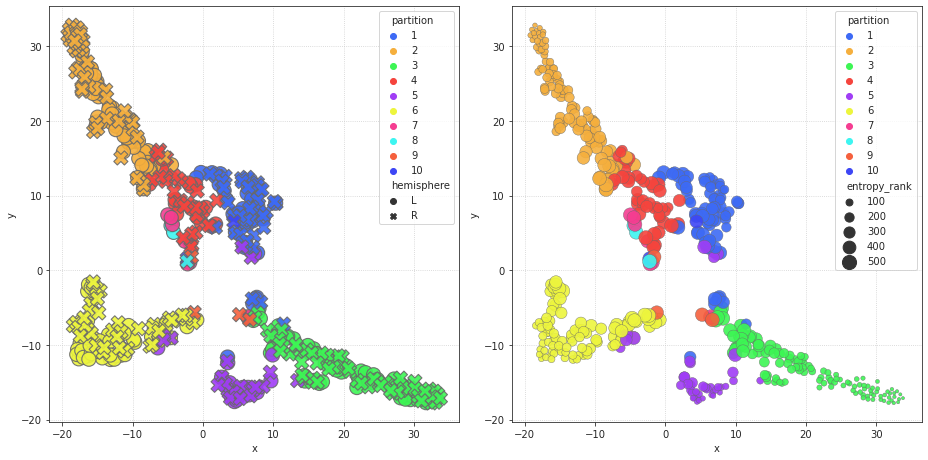

In [23]:
fig, axes = create_figure(1, 2, (13, 6.5), 'ticks')

_df = pd.DataFrame({
    'x': y_emb[:, 0],
    'y': y_emb[:, 1],
    'partition': 1 + np.argmax(pi_avg, axis=0),
    'hemisphere': hemis,
    'entropy': eh,
    'entropy_rank': ehr,
})
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    style='hemisphere',
    markers={'L': 'o', 'R': 'X'},
    palette=svinet.colors,
    s=200,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[0],
)
sns.scatterplot(
    data=_df,
    x='x',
    y='y',
    hue='partition',
    size='entropy_rank',
    sizes=(10, 200),
    palette=svinet.colors,
    edgecolor='dimgrey',
    alpha=0.9,
    ax=axes[1],
)

for ax in axes.ravel():
    ax.grid()
plt.show()

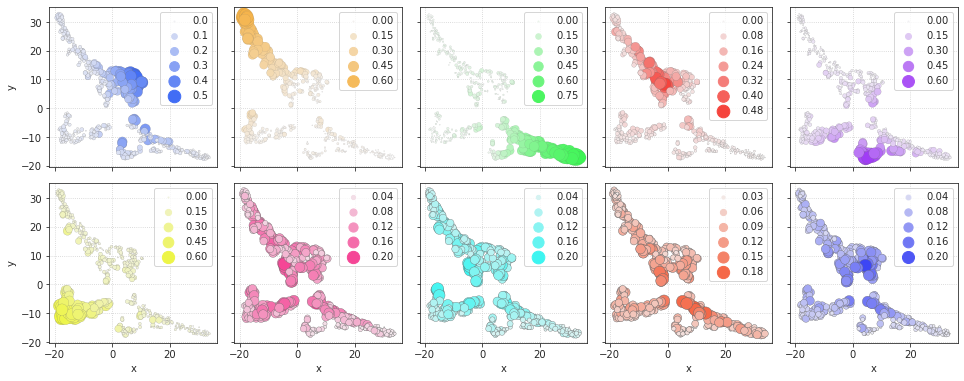

In [26]:
nrows = 2
ncols = int(np.ceil(k / nrows))
fig, axes = create_figure(nrows, ncols, (13.5, 2.7 * nrows), 'ticks', 'all', 'all')

for i, ax in enumerate(axes.ravel()):
    if i == k:
        break

    _df = pd.DataFrame({
        'x': y_emb[:, 0],
        'y': y_emb[:, 1],
        'hemisphere': hemis,
        'strength': np.round(pi_avg[i, :], 2),
    })
    sns.scatterplot(
        data=_df,
        x='x',
        y='y',
        hue='strength',
        size='strength',
        sizes=(1, 160),
        palette=svinet.cmaps[i+1],
        s=120,
        edgecolor='dimgrey',
        ax=ax,
    )
    ax.legend(loc="upper right")
    ax.grid()
trim_axs(axes, k)
plt.show()